# <font color='firebrick'> House Prices - Advanced Regression Techniques  </font>

In [249]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns
import numpy as np
import warnings
import statsmodels.api as sm #Cross-sectional models and methods.
import statsmodels.formula.api as smf #A convenience interface for specifying models using formula strings and DataFrames.
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2


In [261]:
# Suppressing a warning 
warnings.filterwarnings("ignore") 

# It is a magic function that renders the figure in the notebook
%matplotlib inline 

# Changing the figure size of a seaborn axes 
sns.set(rc={"figure.figsize": (20, 15)})

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

# 导入数据

In [263]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

* Firstly, the training set and the test set have the same sample size. 

* Secondly, tt's worth noticing that the test set contains one veraible less than the training set. Obviously, we might suspect that this variable is "SalePrice" since our purpose is to predict its value based on the test set. Consequently, our training set is a lebeled one setting up a supervised learning framework. 

* Finally, the raw data displayed reveals that there are some quasi-constant Features: One of the values is dominant. No worries, we will certainly tackle this issue later on while processing numerical features. 

But at this point, let's check the second claim using the commands below.

In [264]:
# Checking if column headings are the same in both data set
dif_1 = [x for x in df_train.columns if x not in df_test.columns]
print(f"Columns present in df_train and absent in df_test: {dif_1}\n")

dif_2 = [x for x in df_test.columns if x not in df_train.columns]
print(f"Columns present in df_test set and absent in df_train: {dif_2}")

Columns present in df_train and absent in df_test: ['SalePrice']

Columns present in df_test set and absent in df_train: []


In [265]:
# info of each of the variables in our train set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [266]:
# info of each of the variables in our train set
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [267]:
# Drop the 'Id' column from the train set
df_train.drop(["Id"], axis=1, inplace=True)

# Save the list of 'Id' before dropping it from the test set
Id_test_list = df_test["Id"].tolist()
df_test.drop(["Id"], axis=1, inplace=True)

In [268]:
df_train_num = df_train.select_dtypes(exclude=["object"])
df_train_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60        65.00     8450            7            5       2003   
1          20        80.00     9600            6            8       1976   
2          60        68.00    11250            7            5       2001   
3          70        60.00     9550            7            5       1915   
4          60        84.00    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003      196.00         706           0  ...           0   
1          1976        0.00         978           0  ...         298   
2          2002      162.00         486           0  ...           0   
3          1970        0.00         216           0  ...           0   
4          2000      350.00         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

In [269]:
df_train_num = df_train.select_dtypes(include=[np.number])
df_train_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60        65.00     8450            7            5       2003   
1          20        80.00     9600            6            8       1976   
2          60        68.00    11250            7            5       2001   
3          70        60.00     9550            7            5       1915   
4          60        84.00    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003      196.00         706           0  ...           0   
1          1976        0.00         978           0  ...         298   
2          2002      162.00         486           0  ...           0   
3          1970        0.00         216           0  ...           0   
4          2000      350.00         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

We do the same thing with the test set. 

In [270]:
df_test_num = df_test.select_dtypes(include=[np.number])
df_test_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          20        80.00    11622            5            6       1961   
1          20        81.00    14267            6            6       1958   
2          60        74.00    13830            5            5       1997   
3          60        78.00     9978            6            6       1998   
4         120        43.00     5005            8            5       1992   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageArea  \
0          1961        0.00      468.00      144.00  ...      730.00   
1          1958      108.00      923.00        0.00  ...      312.00   
2          1998        0.00      791.00        0.00  ...      482.00   
3          1998       20.00      602.00        0.00  ...      470.00   
4          1992        0.00      263.00        0.00  ...      506.00   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0         140            0              0          0          120         0   
1         393           36              0          0            0         0   
2         212           34              0          0            0         0   
3         360           36              0          0            0         0   
4           0           82              0          0          144         0   

   MiscVal  MoSold  YrSold  
0        0       6    2010  
1    12500       6    2010  
2        0       3    2010  
3        0       6    2010  
4        0       1    2010  

[5 rows x 36 columns]

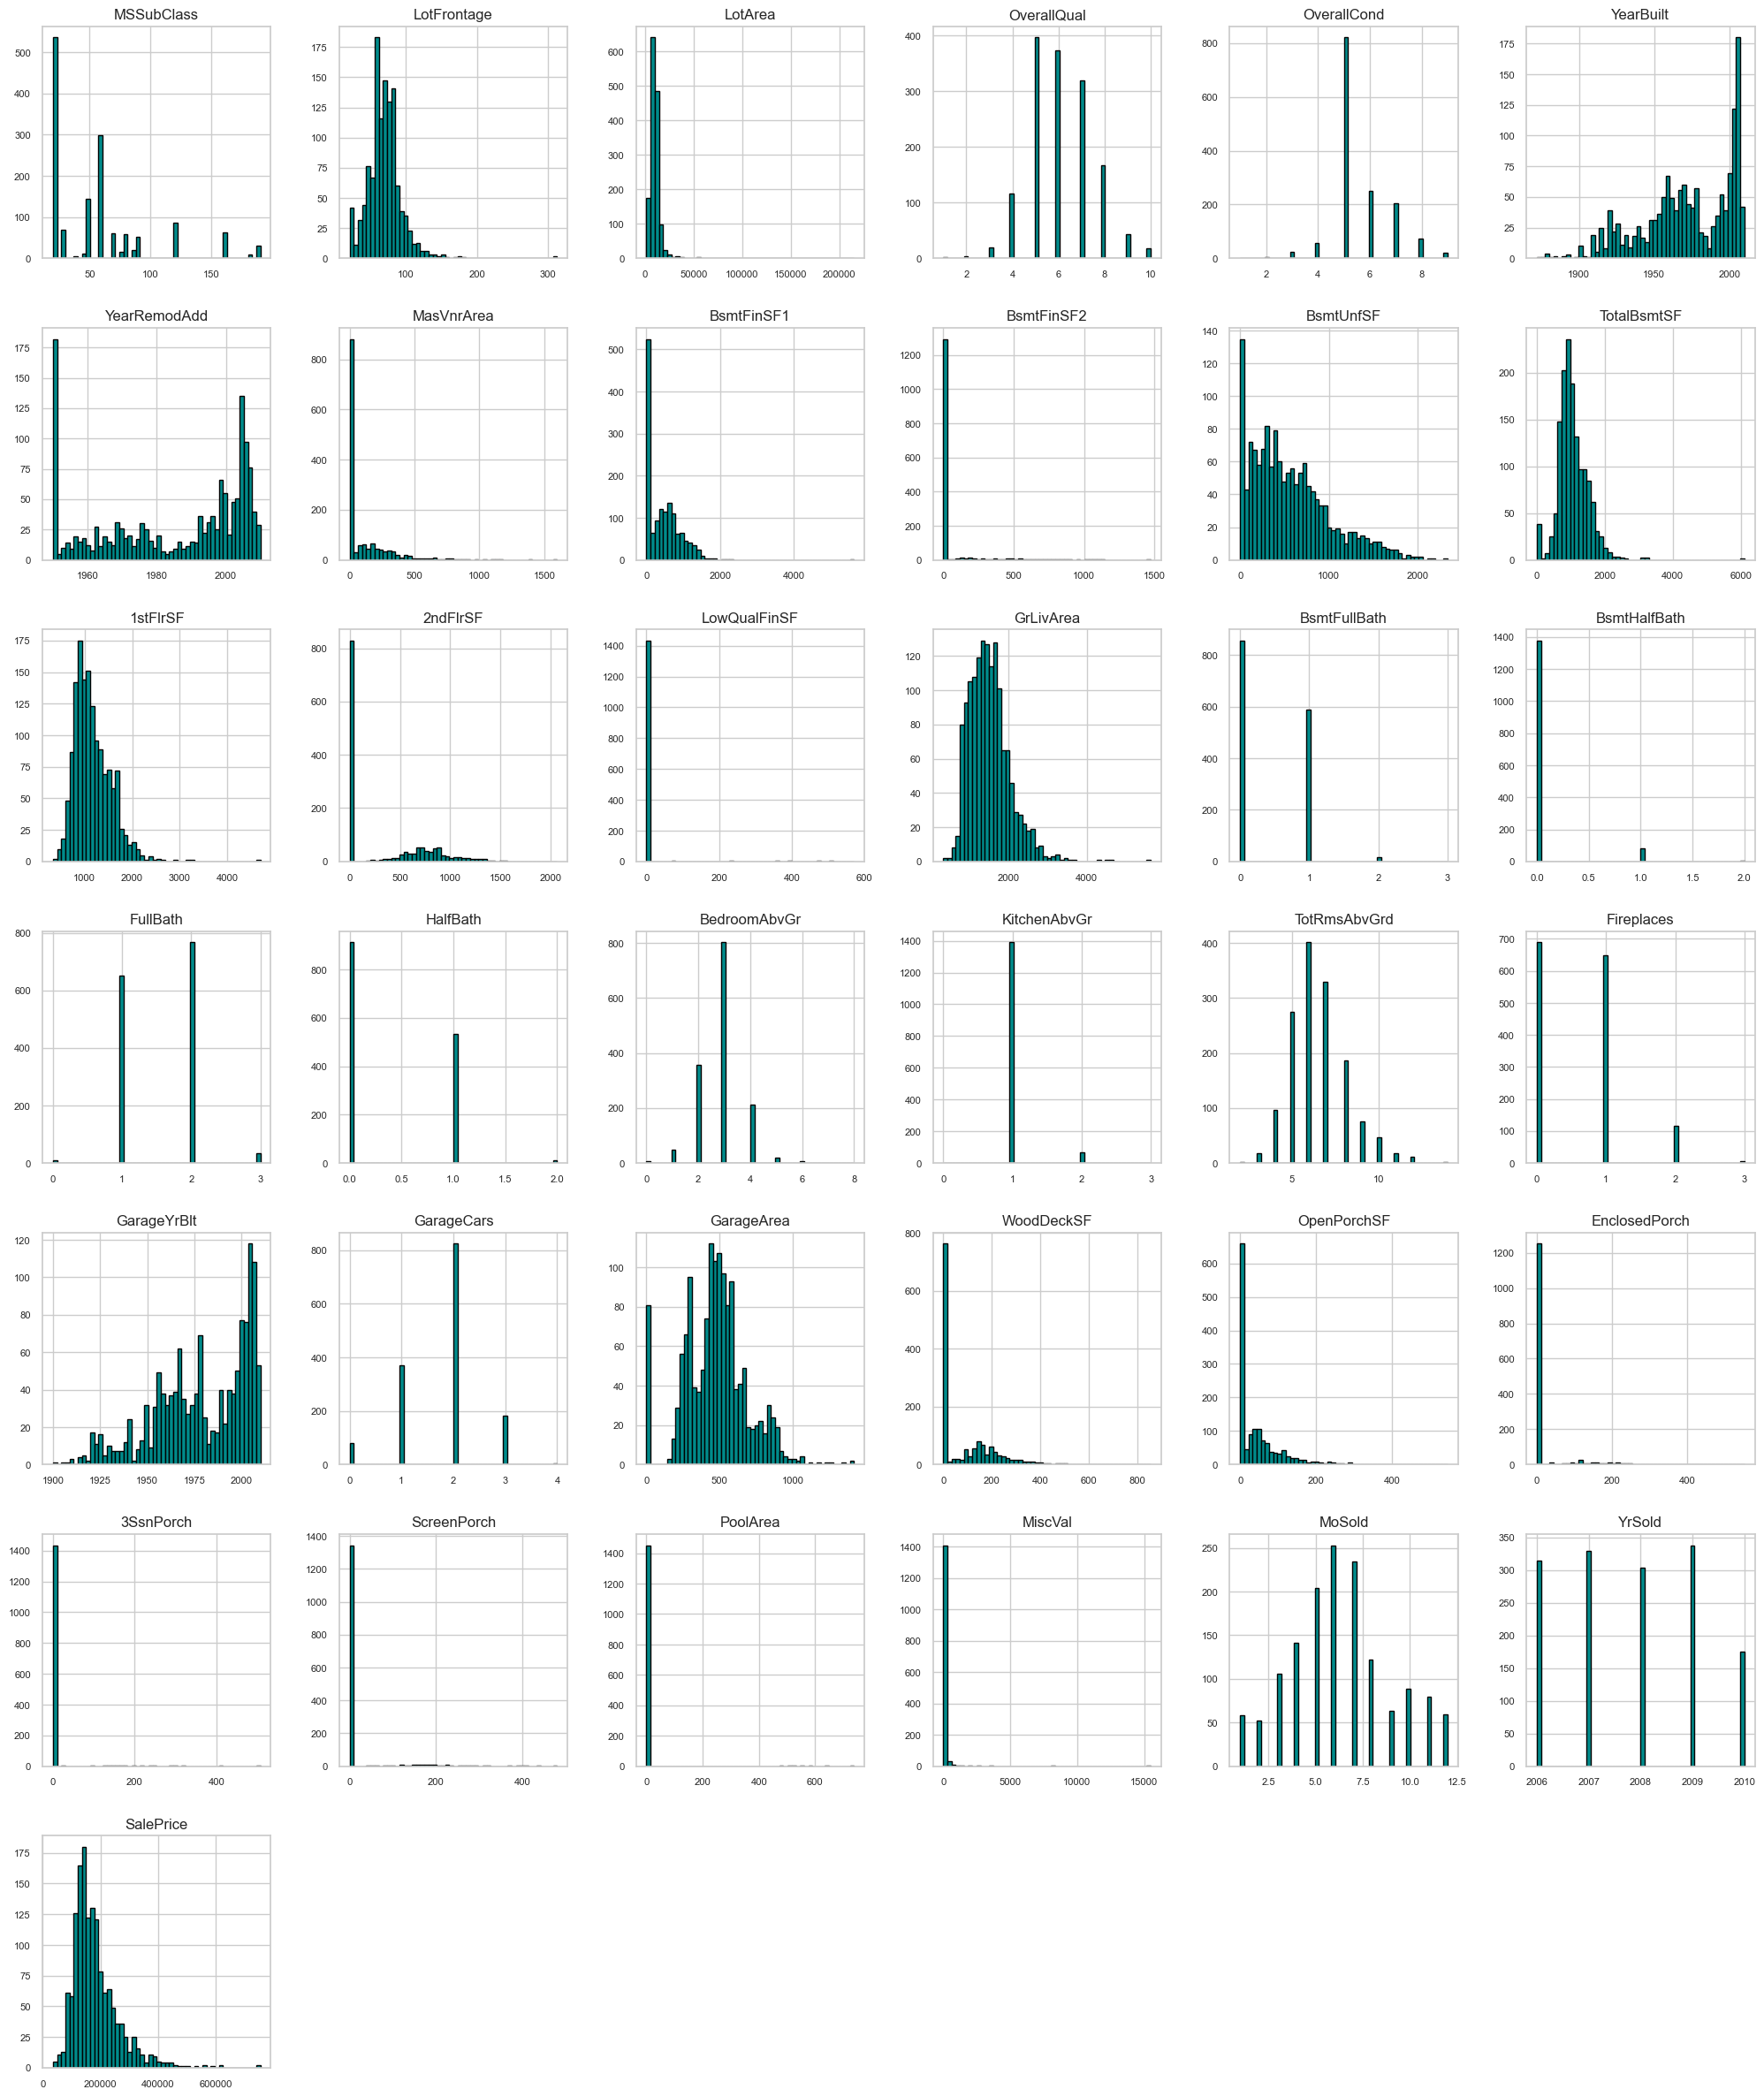

In [271]:
fig_ = df_train_num.hist(figsize=(25, 30), bins=50, color="darkcyan", edgecolor="black", xlabelsize=8, ylabelsize=8)

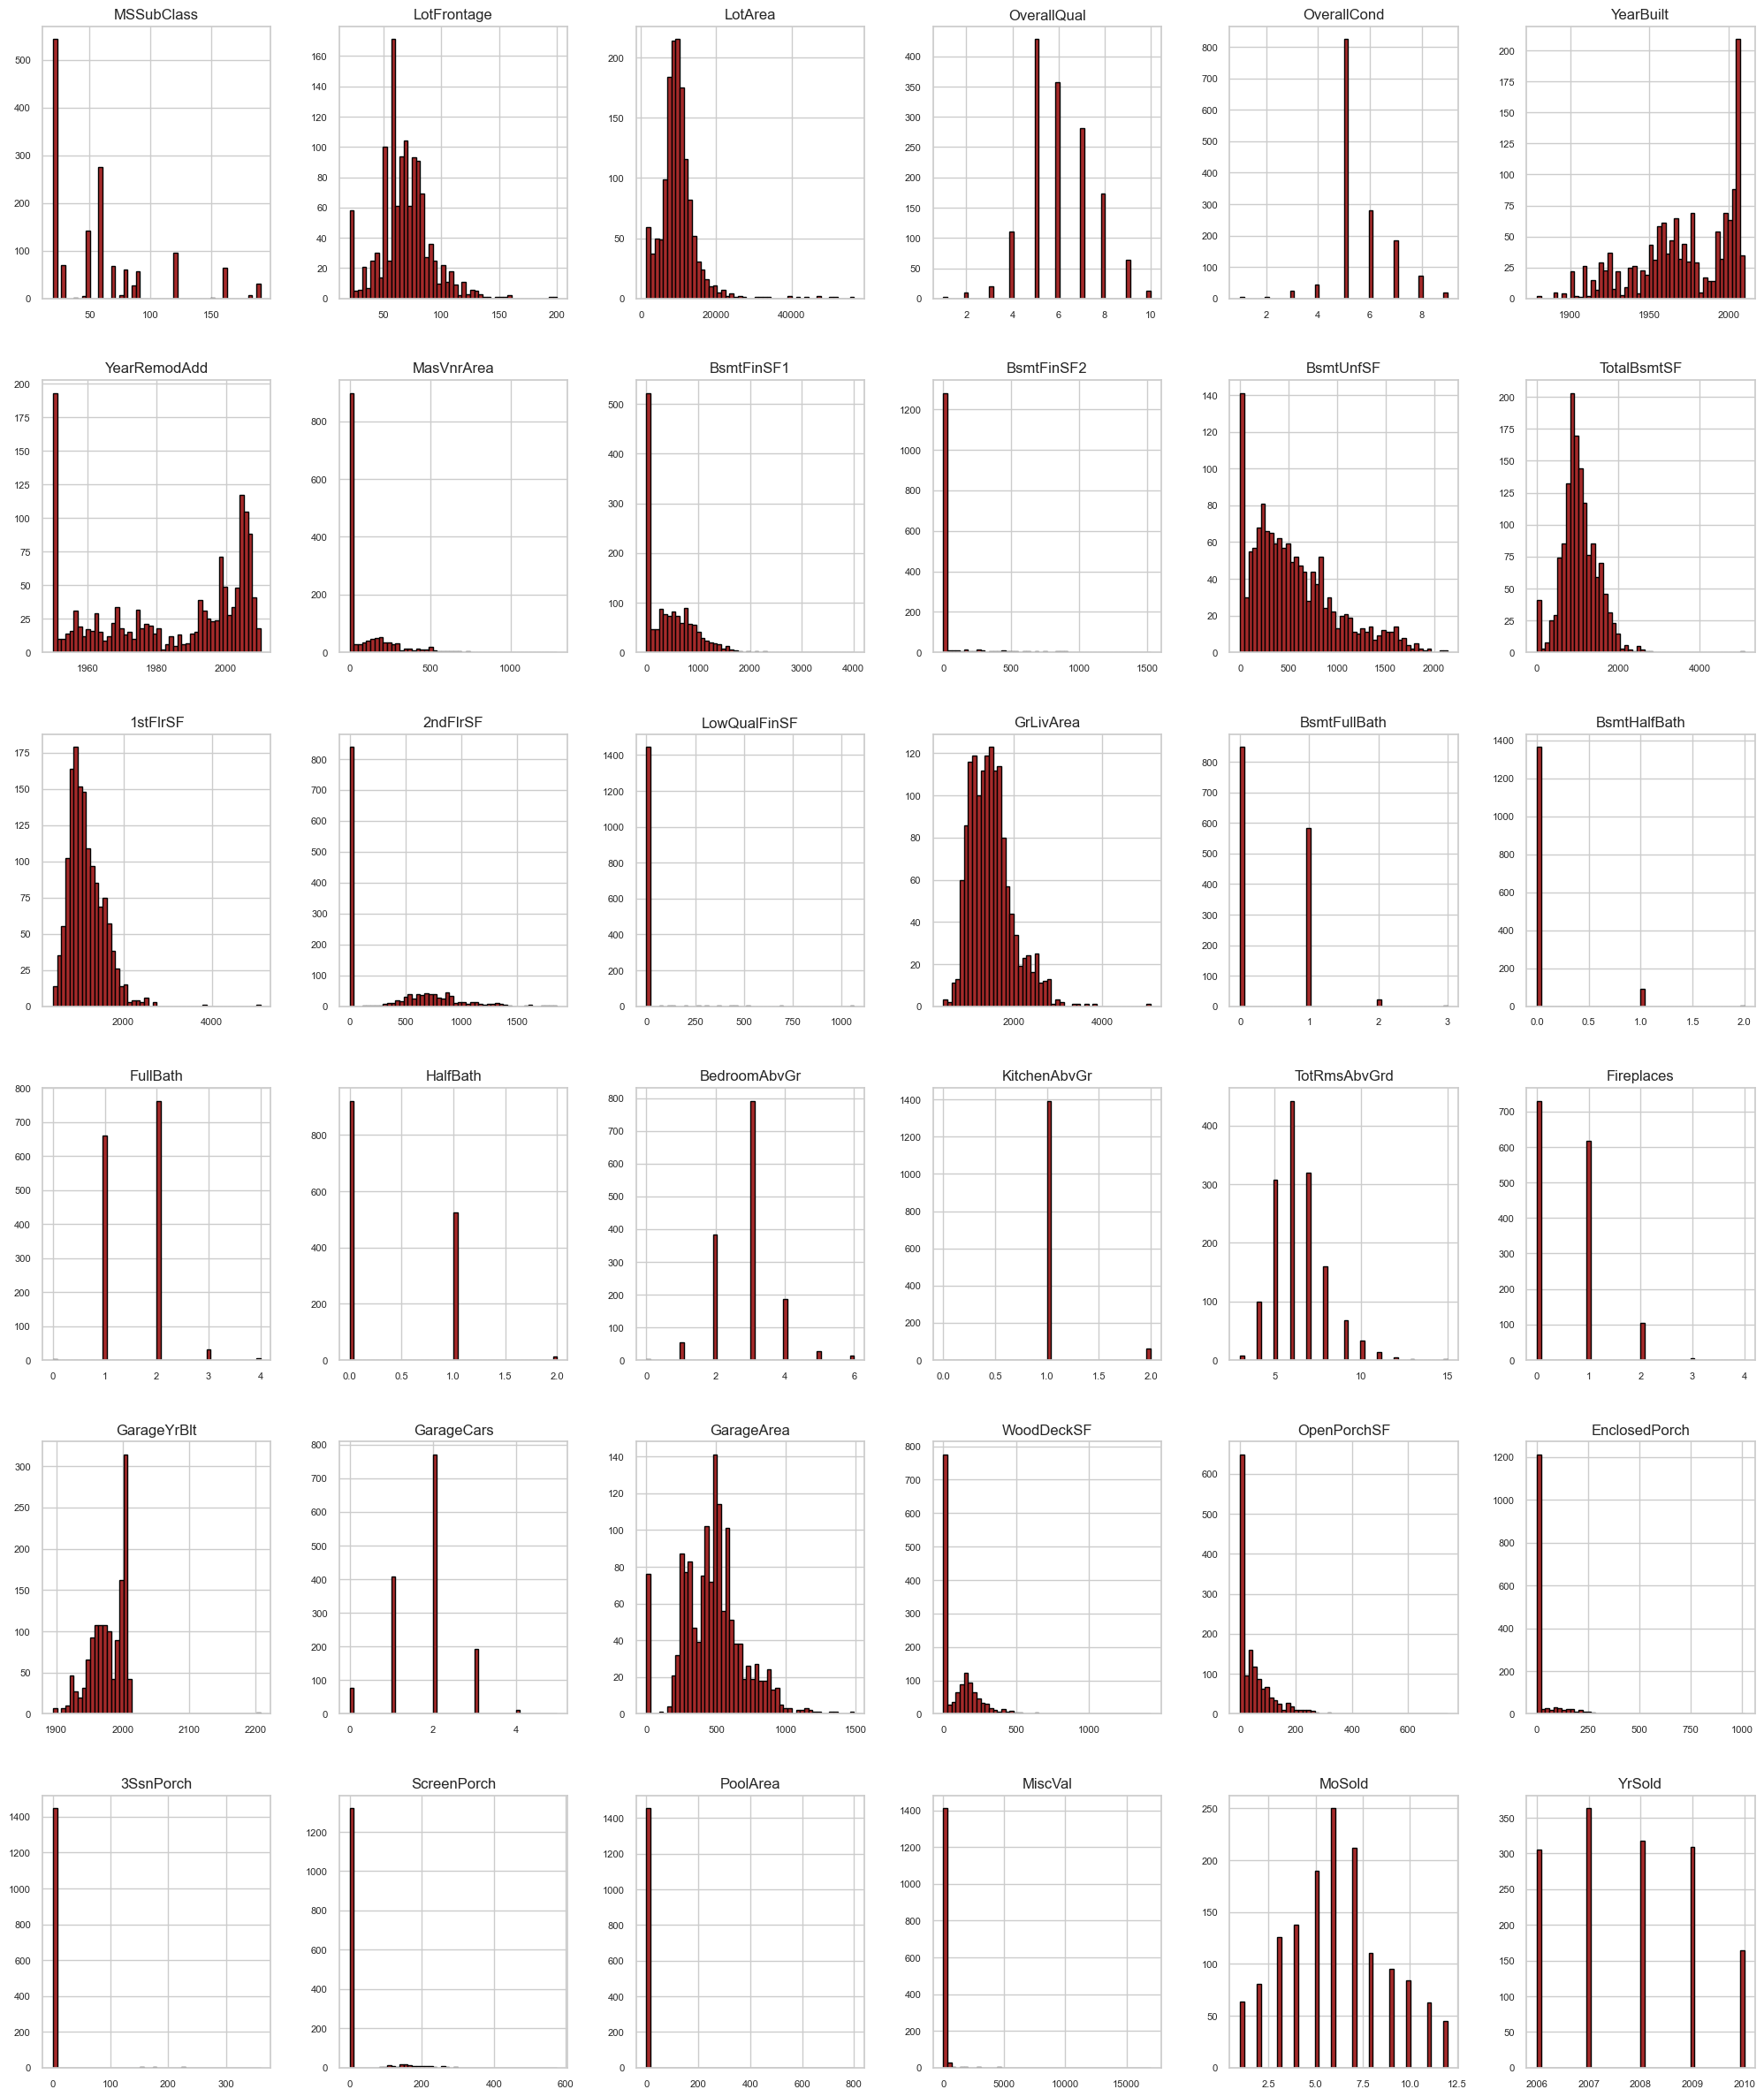

In [272]:
fig_ = df_test_num.hist(figsize=(25, 30), bins=50, color="brown", edgecolor="black", xlabelsize=8, ylabelsize=8)

In [273]:
# Displaying a specific colunm
df_train_num[:]['EnclosedPorch']

0         0
1         0
2         0
3       272
4         0
       ... 
1455      0
1456      0
1457      0
1458    112
1459      0
Name: EnclosedPorch, Length: 1460, dtype: int64

In [274]:
sel = VarianceThreshold(threshold=0.05) # 0.05: drop column where 95% of the values are constant

# fit finds the features with constant variance
sel.fit(df_train_num.iloc[:, :-1])


# Get the number of features that are not constant
print(f"Number of retained features: {sum(sel.get_support())}")

print(f"\nNumber of quasi_constant features: {len(df_train_num.iloc[:, :-1].columns) - sum(sel.get_support())}")

quasi_constant_features_list = [x for x in df_train_num.iloc[:, :-1].columns if x not in df_train_num.iloc[:, :-1].columns[sel.get_support()]]

print(f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")

# Let's drop these columns from df_train_num
df_train_num.drop(quasi_constant_features_list, axis=1, inplace=True)

Number of retained features: 35

Number of quasi_constant features: 1

Quasi-constant features to be dropped: ['KitchenAbvGr']


In [275]:
# Checking the dimensions of the set obtained
print(df_train_num.shape)

(1460, 36)


In [276]:
sel = VarianceThreshold(threshold=0.05) # 0.05: drop column where 95% of the values are constant

# fit finds the features with constant variance
sel.fit(df_test_num.iloc[:, :-1])


# Get the number of features that are not constant
print(f"Number of retained features: {sum(sel.get_support())}")

print(f"\nNumber of quasi_constant features: {len(df_test_num.iloc[:, :-1].columns) - sum(sel.get_support())}")

quasi_constant_features_list = [x for x in df_test_num.iloc[:, :-1].columns if x not in df_test_num.iloc[:, :-1].columns[sel.get_support()]]

print(f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")

# Let's drop these columns from df_train_num
df_test_num.drop(quasi_constant_features_list, axis=1, inplace=True)

Number of retained features: 34

Number of quasi_constant features: 1

Quasi-constant features to be dropped: ['KitchenAbvGr']


In [277]:
# Checking the dimensions of the set obtained
print(df_test_num.shape)

(1459, 35)


In [157]:
# Extracting column names as a list
# cols = list (df_train_num.columns)
# cols

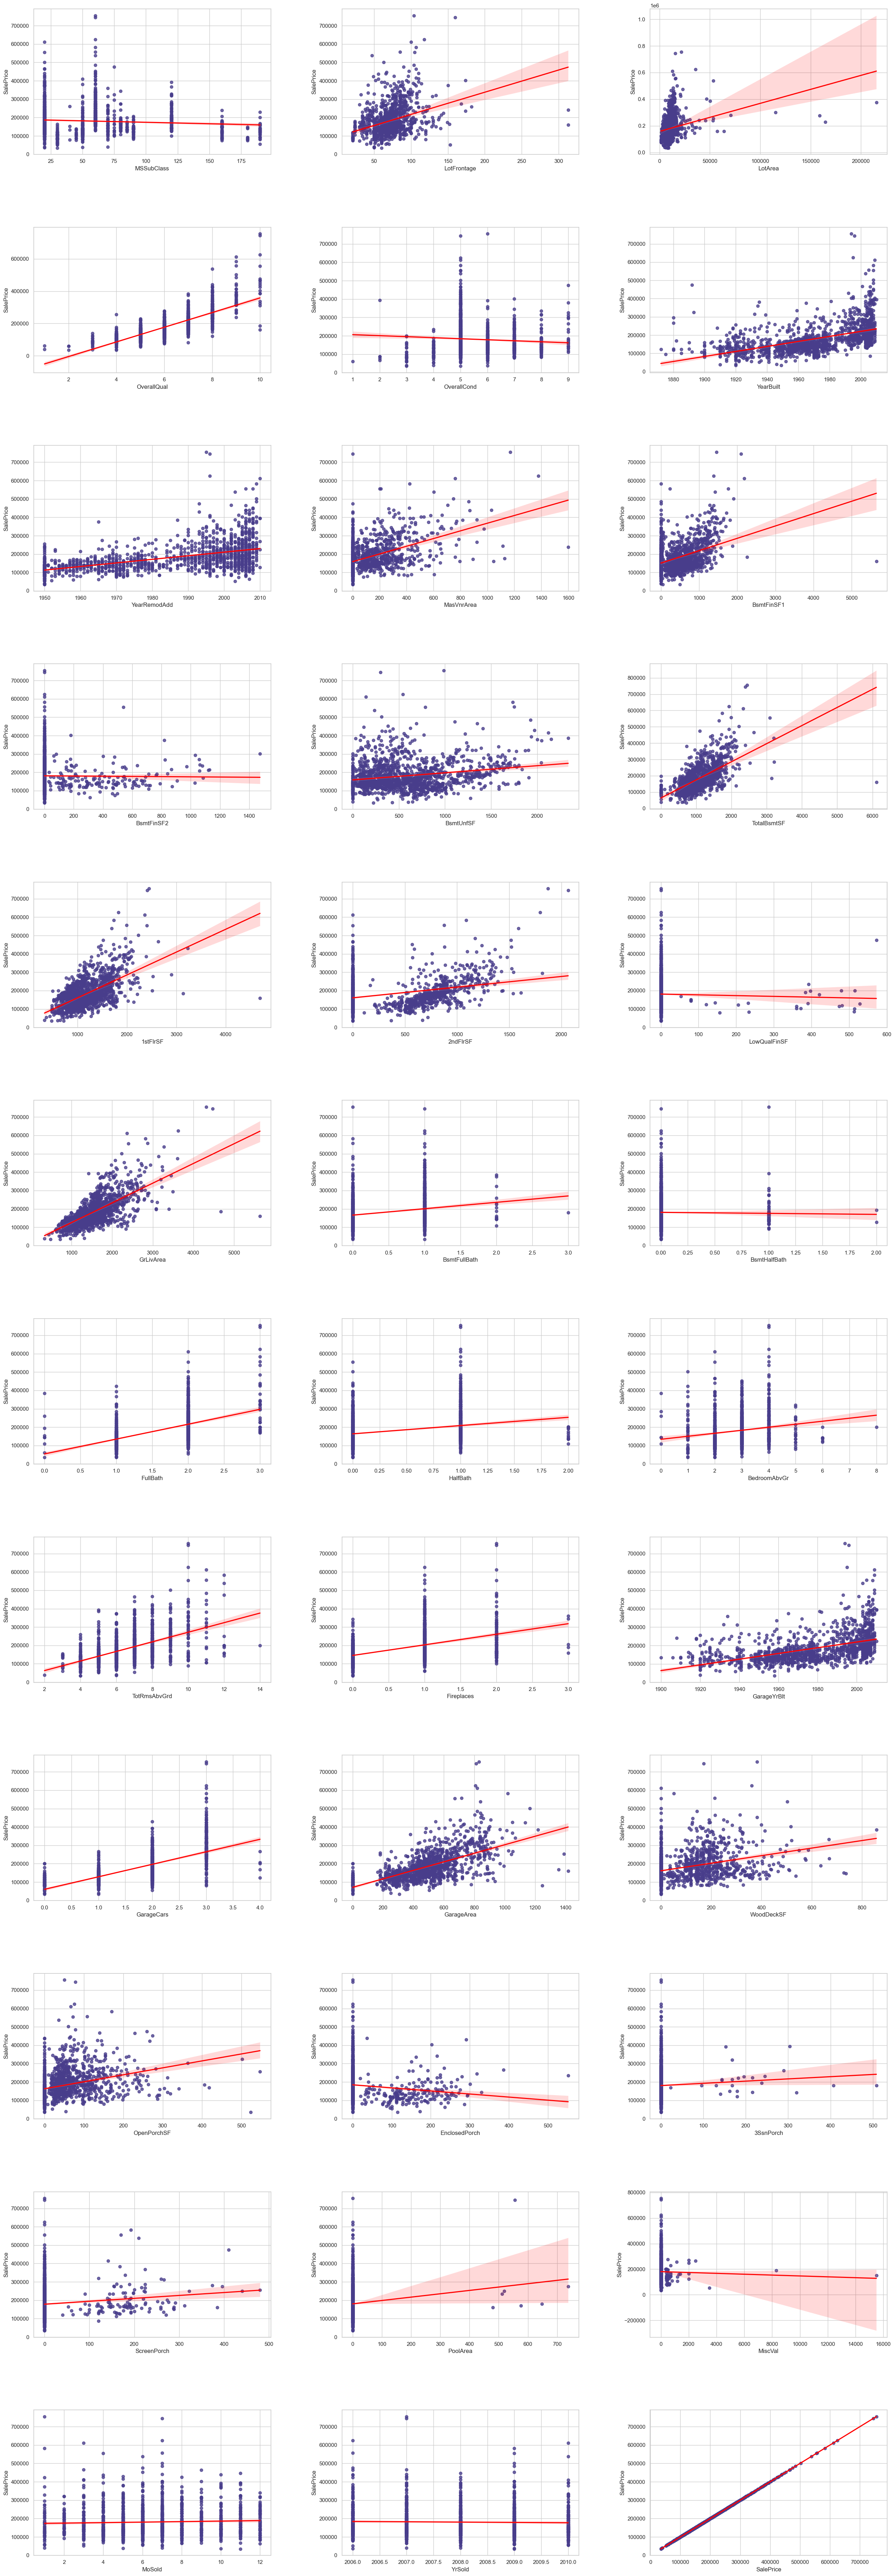

In [278]:
fig = plt.figure(figsize=(30,50))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.5)
for i, col in enumerate(df_train_num.columns):
        plt.subplot(15,3,i+1)
        sns.regplot(x=col, y= "SalePrice", data=df_train_num, scatter_kws={"color": "darkslateblue"}, line_kws={"color": "red"})

<Axes: >

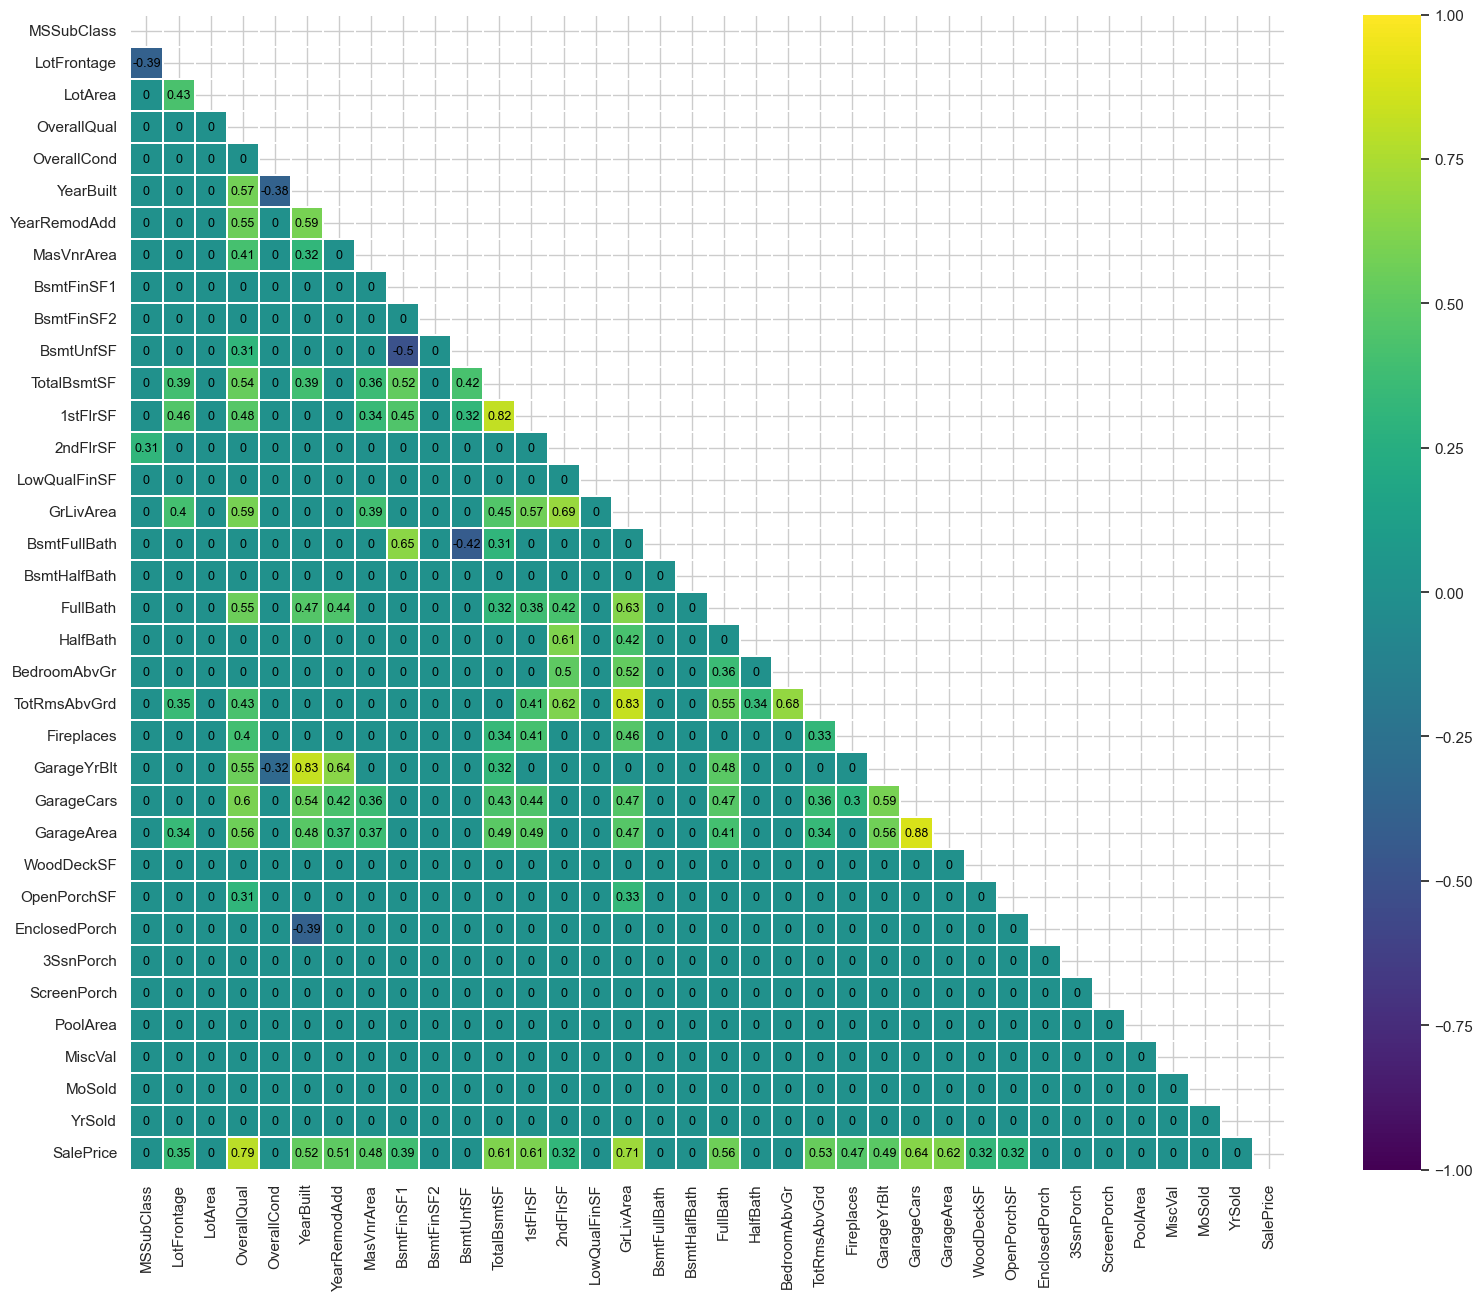

In [279]:
# Heatmap for all the remaining numerical data including the taget 'SalePrice'

# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

# Define correlation matrix 
# (method = pearson: standard correlation coefficient)
corr_matrix = df_train_num.corr(method = 'pearson')

# Replace correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0

# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose the color map
cmap = "viridis"

# plot the heatmap
sns.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True)

In [280]:
# Strongly Correlated Features
XSC = ["GarageArea", "GarageYrBlt", "1stFlrSF", "TotRmsAbvGrd"]
XSC

['GarageArea', 'GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd']

#### Wrapping up

2 strongly correlated values with SalePrice:
OverallQual   0.79
GrLivArea     0.71
Name: SalePrice, dtype: float64



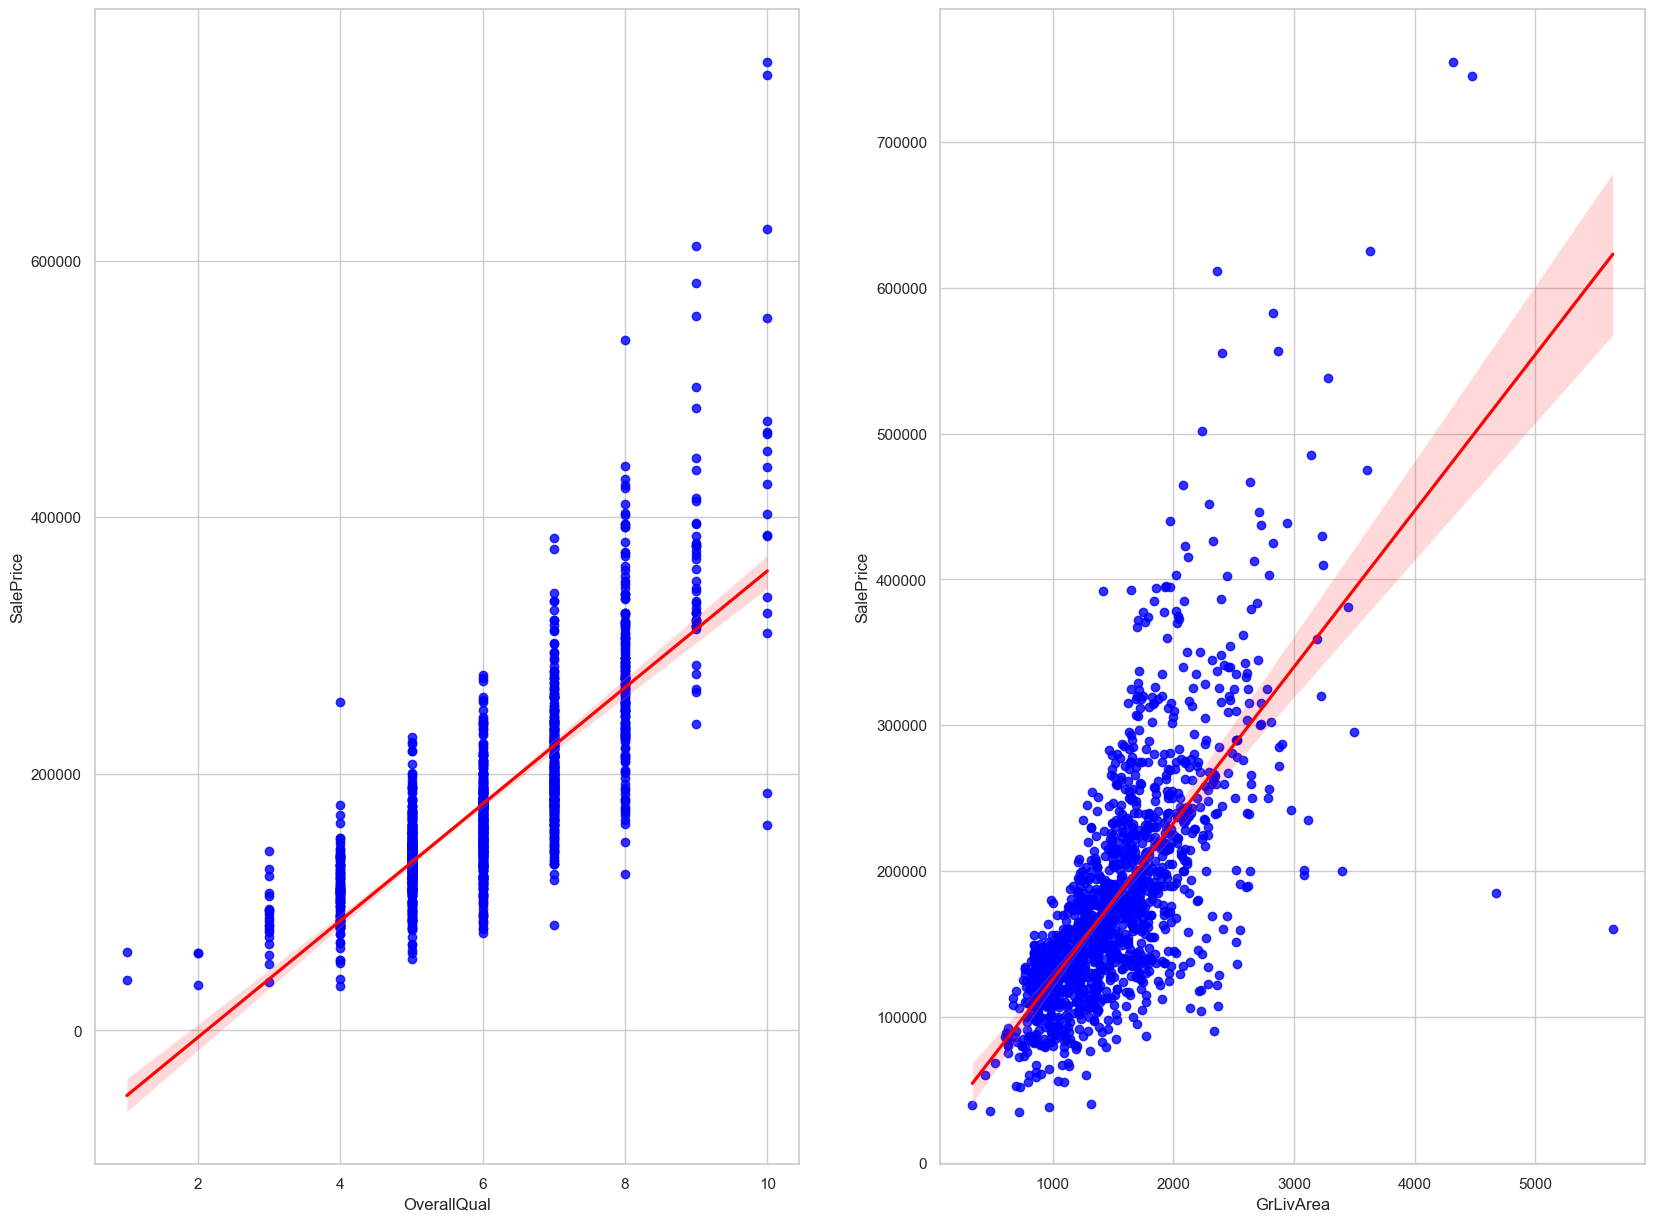

In [282]:
df_num_corr = df_train_num.corr()["SalePrice"][:-1]

#################################
# Correlated features (r2 > 0.7)
strong_features_list = df_num_corr[abs(df_num_corr) >= 0.7].sort_values(ascending=False)
print(f"{len(strong_features_list)} strongly correlated values with SalePrice:\n{strong_features_list}\n")

strong_features = df_num_corr[abs(df_num_corr) >= 0.7].index.tolist()
strong_features.append("SalePrice")

df_strong_features = df_train_num.loc[:, strong_features]

fig, ax = plt.subplots(round(len(strong_features) / 3), 2)

for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    if i < len(strong_features)-1:
        sns.regplot(x=strong_features[i], y="SalePrice", data=df_strong_features, ax=ax, scatter_kws={
                    "color": "blue"}, line_kws={"color": "red"})

8 moderately correlated values with SalePrice:
GarageCars     0.64
GarageArea     0.62
TotalBsmtSF    0.61
1stFlrSF       0.61
FullBath       0.56
TotRmsAbvGrd   0.53
YearBuilt      0.52
YearRemodAdd   0.51
Name: SalePrice, dtype: float64



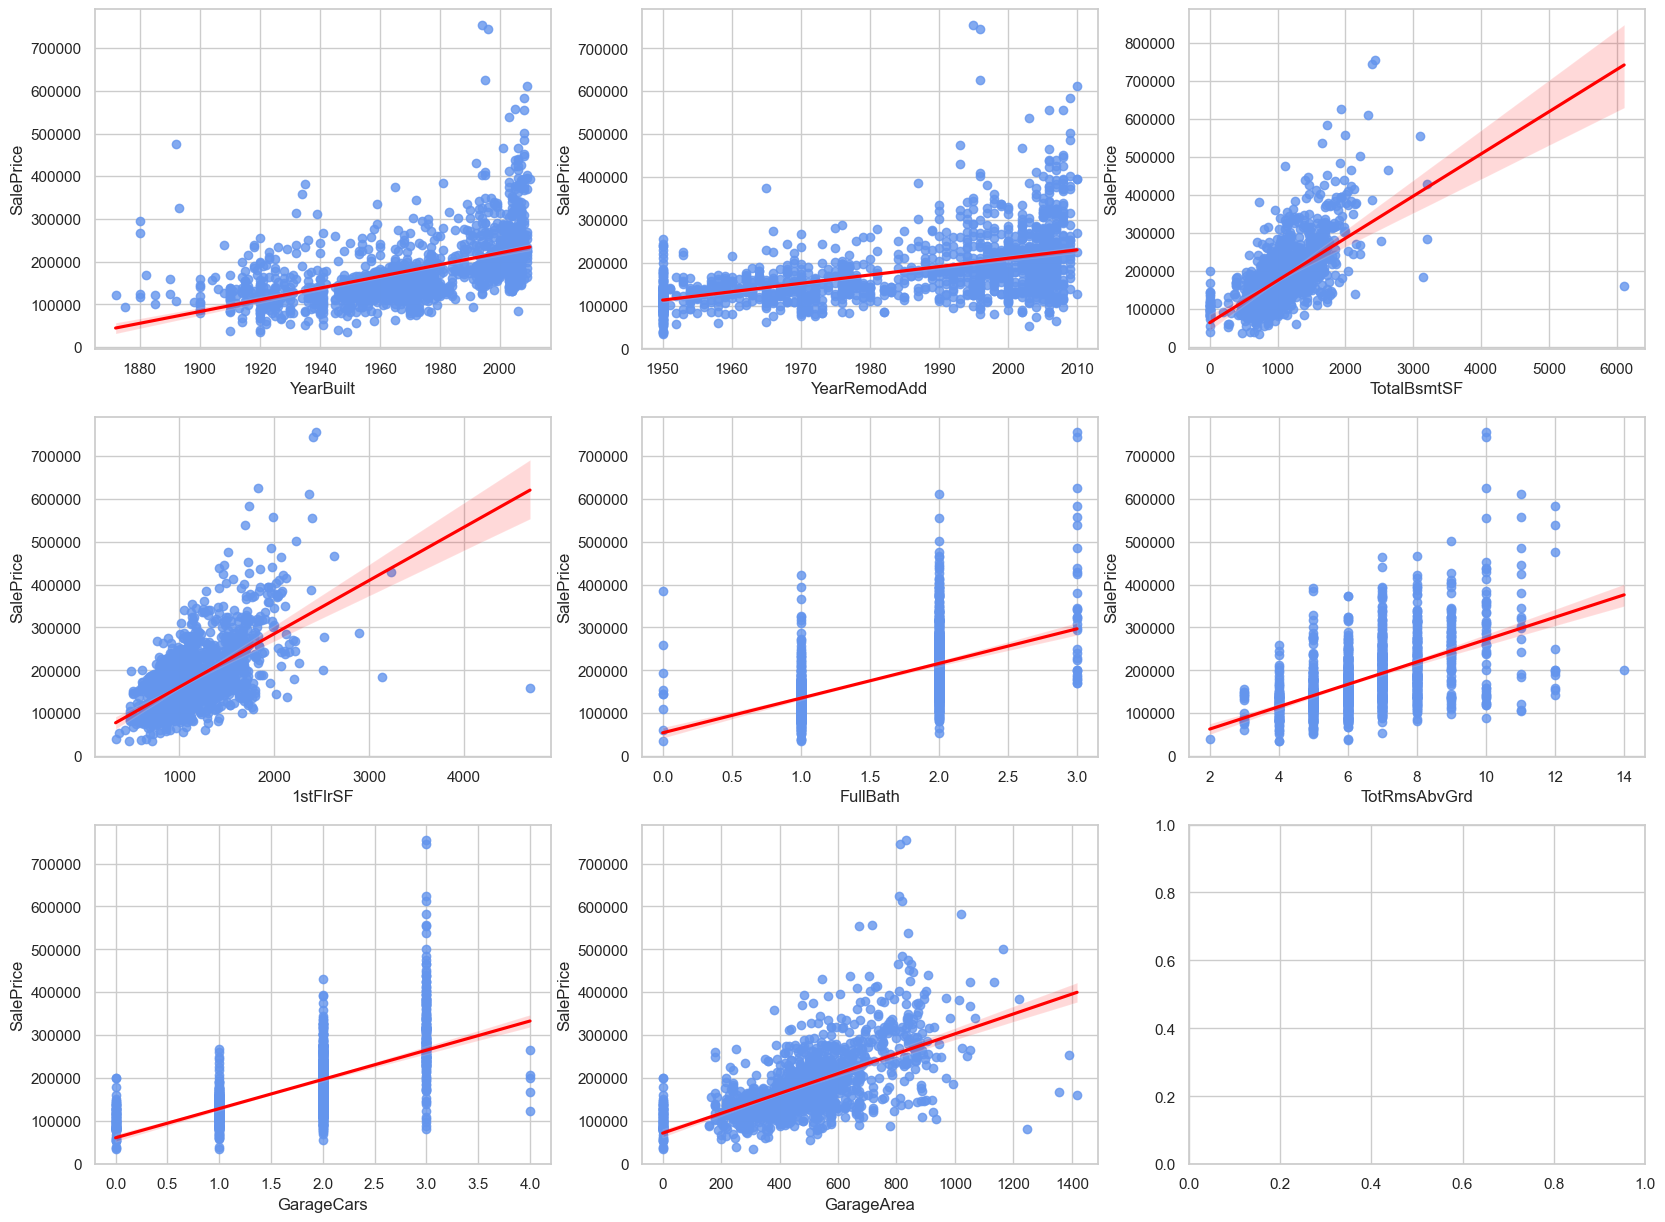

In [283]:
######################################
# Correlated features (0.5 < r2 < 0.7)
moderate_features_list = df_num_corr[(abs(df_num_corr) < 0.7) & (abs(df_num_corr) >= 0.5)].sort_values(ascending=False)
print(f"{len(moderate_features_list)} moderately correlated values with SalePrice:\n{moderate_features_list}\n")

moderate_features = df_num_corr[(abs(df_num_corr) < 0.7) & (abs(df_num_corr) >= 0.5)].index.tolist()
moderate_features.append("SalePrice")

df_moderate_features = df_train_num.loc[:, moderate_features]

fig, ax = plt.subplots(round(len(moderate_features) / 3), 3)

for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    if i < len(moderate_features)-1:
        sns.regplot(x=moderate_features[i], y="SalePrice", data=df_moderate_features, ax=ax, scatter_kws={
                    "color": "cornflowerblue"}, line_kws={"color": "red"})

8 weakly correlated values with SalePrice:
GarageYrBlt   0.49
MasVnrArea    0.48
Fireplaces    0.47
BsmtFinSF1    0.39
LotFrontage   0.35
WoodDeckSF    0.32
2ndFlrSF      0.32
OpenPorchSF   0.32
Name: SalePrice, dtype: float64


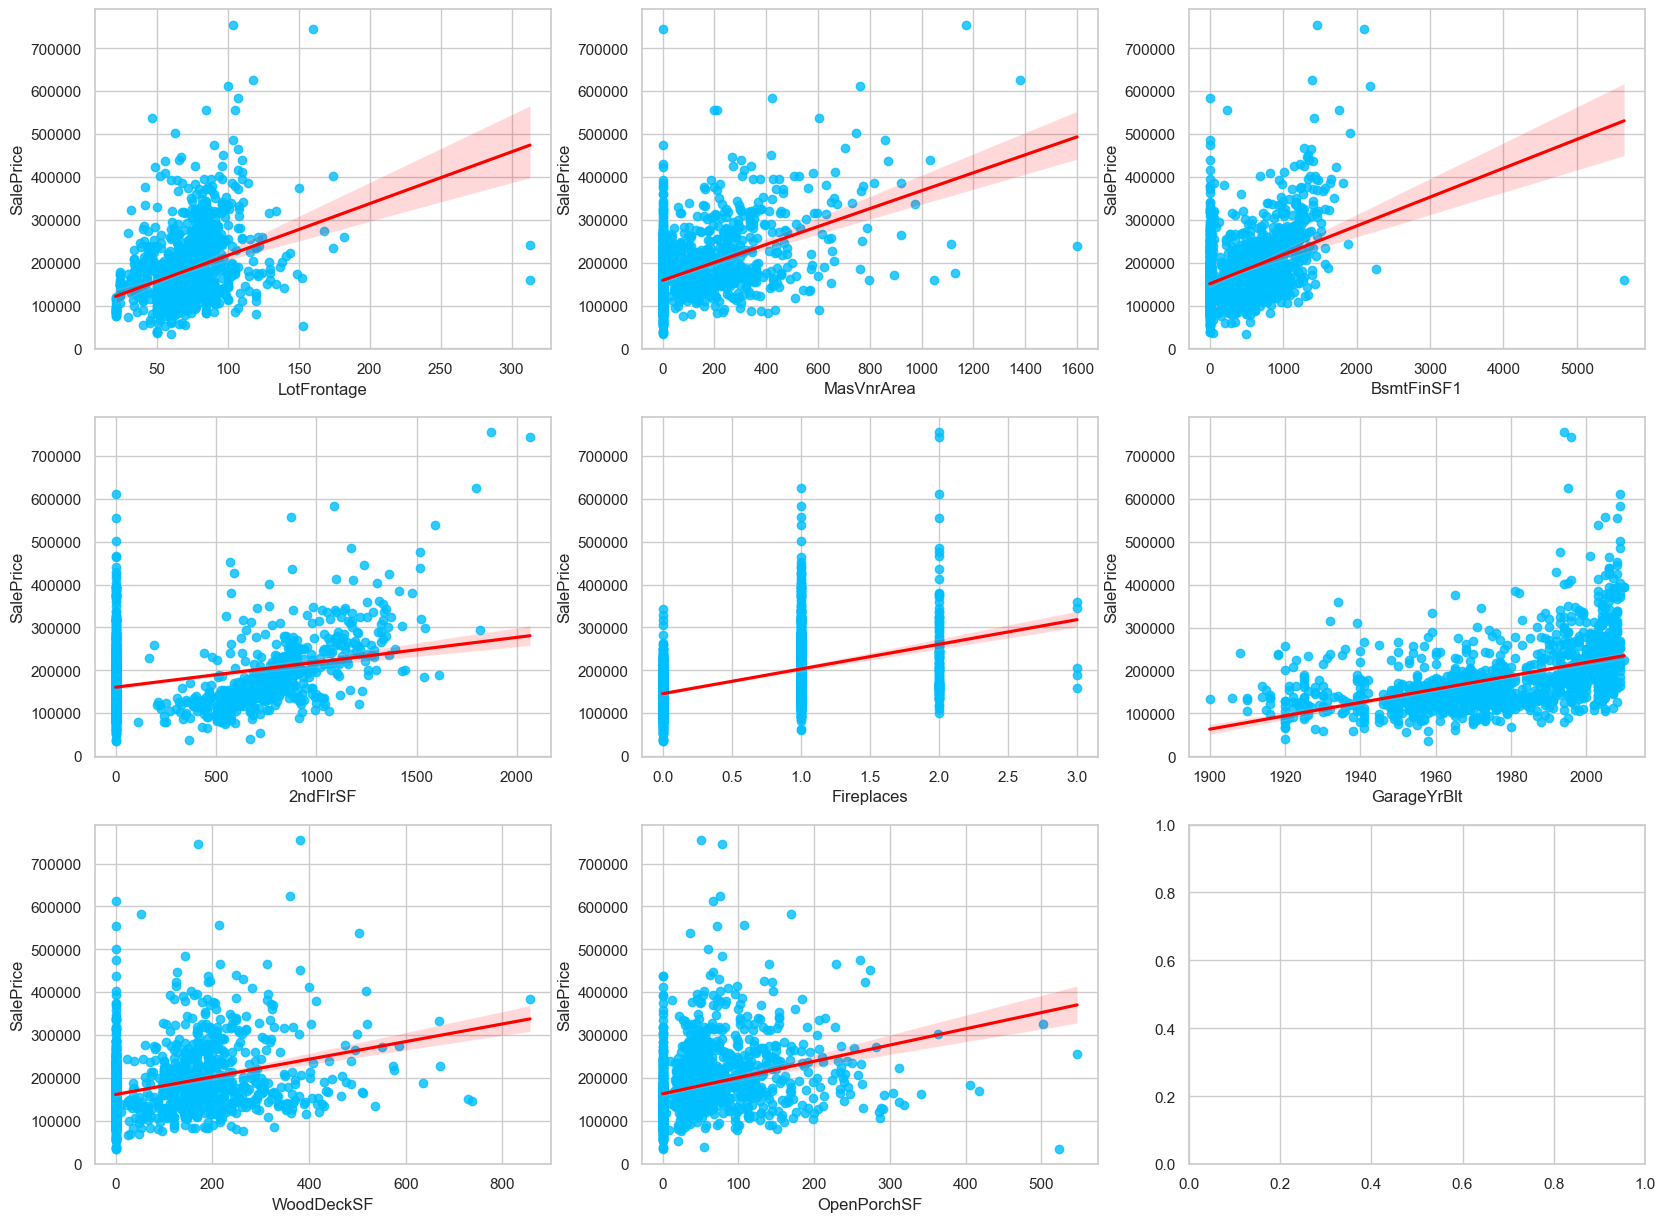

In [284]:
######################################
# Correlated features (0.3 < r2 < 0.5)
weak_features_list = df_num_corr[(abs(df_num_corr) < 0.5) & (abs(df_num_corr) >= 0.3)].sort_values(ascending=False)
print(f"{len(weak_features_list)} weakly correlated values with SalePrice:\n{weak_features_list}")

# Features with low correlation (between 0.3 and 0.5)
weak_features = df_num_corr[(abs(df_num_corr) >= 0.3) & (
    abs(df_num_corr) < 0.5)].index.tolist()
weak_features.append("SalePrice")

df_weak_features = df_train_num.loc[:, weak_features]

fig, ax = plt.subplots(round(len(weak_features) / 3), 3)

for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    if i < len(weak_features) - 1:
        sns.regplot(x=weak_features[i], y="SalePrice", data=df_weak_features, ax=ax, scatter_kws={
                    "color": "deepskyblue"}, line_kws={"color": "red"},)

In [285]:
# Define the list of numerical fetaures to keep
list_of_numerical_features = strong_features[:-1] + moderate_features[:-1] + weak_features

# Let's select these features form our train set
df_train_num = df_train_num.loc[:, list_of_numerical_features]

# The same features are selected from the test set (-1 -> except 'SalePrice')
df_test_num = df_test.loc[:, list_of_numerical_features[:-1]]

# Display except the last column
df_train_num.iloc[:, :-1]

OverallQual  GrLivArea  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  \
0               7       1710       2003          2003          856       856   
1               6       1262       1976          1976         1262      1262   
2               7       1786       2001          2002          920       920   
3               7       1717       1915          1970          756       961   
4               8       2198       2000          2000         1145      1145   
...           ...        ...        ...           ...          ...       ...   
1455            6       1647       1999          2000          953       953   
1456            6       2073       1978          1988         1542      2073   
1457            7       2340       1941          2006         1152      1188   
1458            5       1078       1950          1996         1078      1078   
1459            5       1256       1965          1965         1256      1256   

      FullBath  TotRmsAbvGrd  GarageCars  GarageArea  LotFrontage  MasVnrArea  \
0            2             8           2         548        65.00      196.00   
1            2             6           2         460        80.00        0.00   
2            2             6           2         608        68.00      162.00   
3            1             7           3         642        60.00        0.00   
4            2             9           3         836        84.00      350.00   
...        ...           ...         ...         ...          ...         ...   
1455         2             7           2         460        62.00        0.00   
1456         2             7           2         500        85.00      119.00   
1457         2             9           1         252        66.00        0.00   
1458         1             5           1         240        68.00        0.00   
1459         1             6           1         276        75.00        0.00   

      BsmtFinSF1  2ndFlrSF  Fireplaces  GarageYrBlt  WoodDeckSF  OpenPorchSF  
0            706       854           0     2,003.00           0           61  
1            978         0           1     1,976.00         298            0  
2            486       866           1     2,001.00           0           42  
3            216       756           1     1,998.00           0           35  
4            655      1053           1     2,000.00         192           84  
...          ...       ...         ...          ...         ...          ...  
1455           0       694           1     1,999.00           0           40  
1456         790         0           2     1,978.00         349            0  
1457         275      1152           2     1,941.00           0           60  
1458          49         0           0     1,950.00         366            0  
1459         830         0           0     1,965.00         736           68  

[1460 rows x 18 columns]

In [286]:
# Training set
for i, col in enumerate(XSC):
    if col in df_train_num.columns:
        df_train_num.drop(col, axis=1, inplace=True)

# Checking if column headings are the same in both data sets
dif_3 = [x for x in XSC if x not in df_train_num.columns]
print(f"Columns present in XSC and absent in df_train_num: {dif_3}\n")

# Testing set
for i, col in enumerate(XSC):
    if col in df_test_num.columns:
        df_test_num.drop(col, axis=1, inplace=True)

# Checking if column headings are the same in both data sets
dif_4 = [x for x in XSC if x not in df_test_num.columns]
print(f"Columns present in XSC and absent in df_test_num: {dif_4}\n")

Columns present in XSC and absent in df_train_num: ['GarageArea', 'GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd']

Columns present in XSC and absent in df_test_num: ['GarageArea', 'GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd']



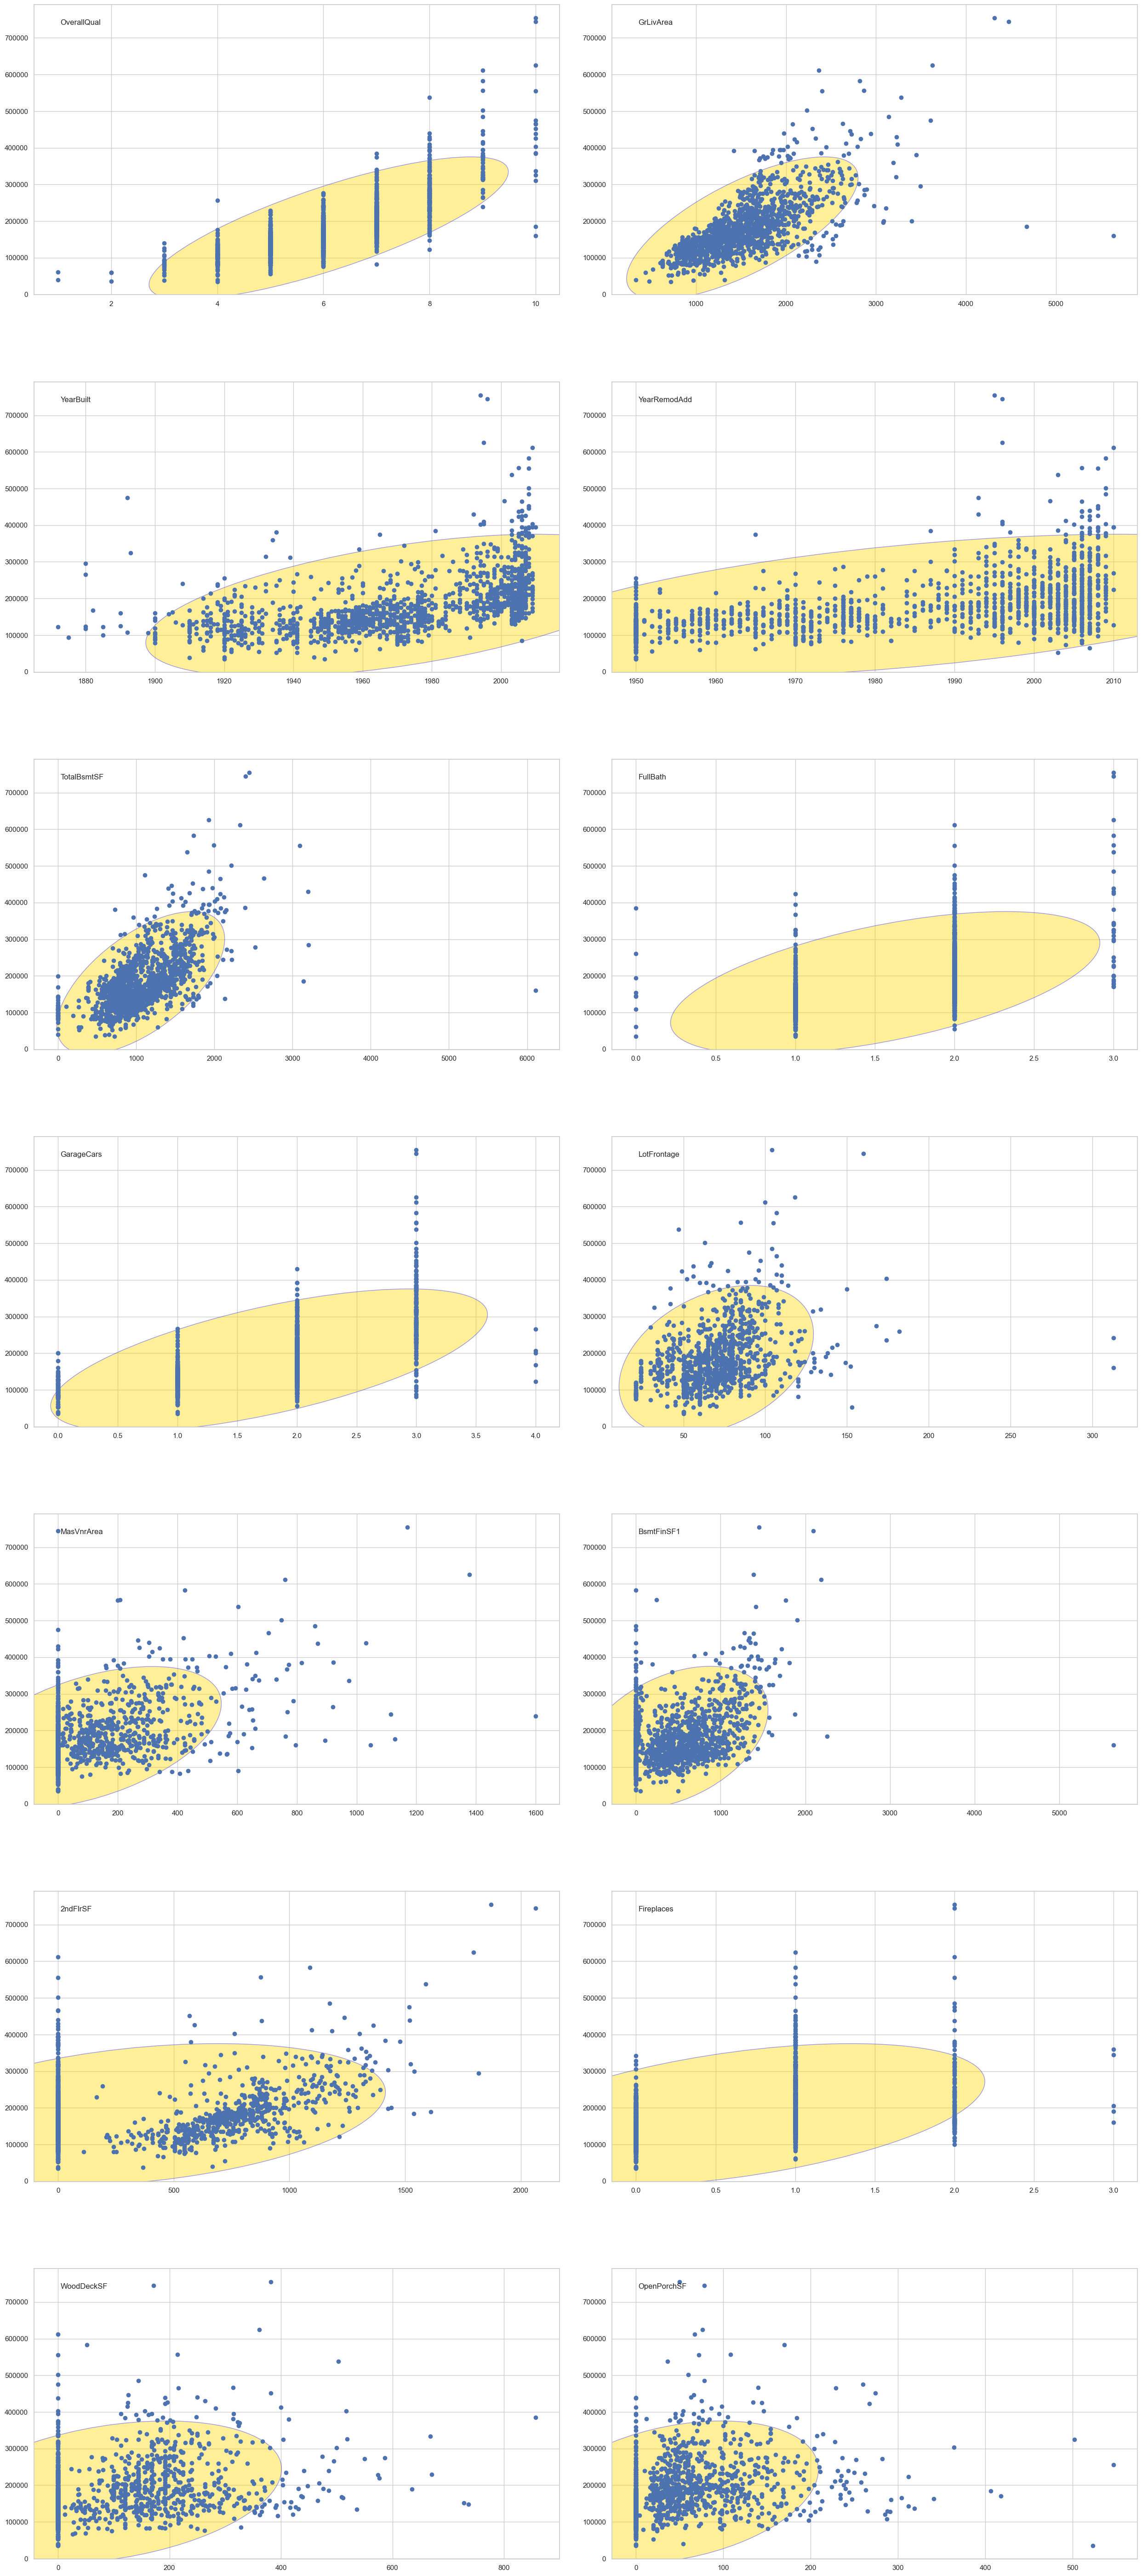

In [287]:
fig = plt.figure(figsize=(30,40))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.1,
                    hspace=0.3) 
for i, col in enumerate(df_train_num.iloc[:, :-1].columns):
    df = df_train_num[[col, 'SalePrice']]
    df = df.dropna()
    df = df.to_numpy()

    # Covariance matrix
    covariance  = np.cov(df , rowvar=False)

    # Covariance matrix power of -1
    covariance_pm1 = np.linalg.matrix_power(covariance, -1)

    # Center point
    centerpoint = np.mean(df , axis=0)

    # Distances between center point and 
    distances = []
    for j, val in enumerate(df):
            p1 = val
            p2 = centerpoint
            distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
            distances.append(distance)
    distances = np.array(distances)

    # Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
    cutoff = chi2.ppf(0.95, df.shape[1])

    # Index of outliers
    outlierIndexes = np.where(distances > cutoff )

    #print('--- Index of Outliers ----')
    #print(outlierIndexes)

    #print('--- Observations found as outlier -----')
    #print(df[ distances > cutoff , :])

    ## Finding ellipse dimensions 
    pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    lambda_, v = np.linalg.eig(covariance)
    lambda_ = np.sqrt(lambda_)
    
    # Ellipse patch   
    ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='blue')
    ellipse.set_facecolor('gold')
    ellipse.set_alpha(0.4)
    ax = plt.subplot(9, 2, i+1)
    ax.add_artist(ellipse)
    #ellipse.set_hatch('+')
    plt.scatter(df[: , 0], df[ : , 1])
    ax.text(.05, .95, col , transform=ax.transAxes, ha="left", va="top")

Text(0, 0.5, 'Column Name\n')

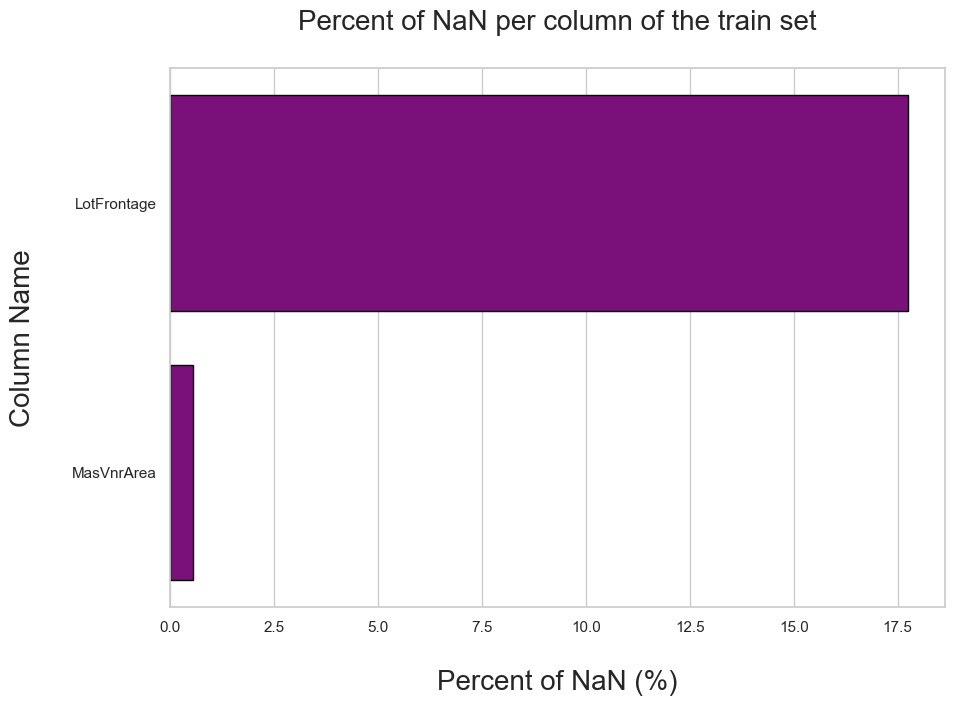

In [288]:
# Check the NaN of the train set by ploting percent of missing values per column
column_with_nan = df_train_num.columns[df_train_num.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_train_num[i].isnull().sum()*100/len(df_train_num), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="darkmagenta")

p.set_title("Percent of NaN per column of the train set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [289]:
# Imputation of missing values (NaNs) with SimpleImputer
my_imputer = SimpleImputer(strategy="median")
df_train_imputed = pd.DataFrame(my_imputer.fit_transform(df_train_num))
df_train_imputed.columns = df_train_num.columns

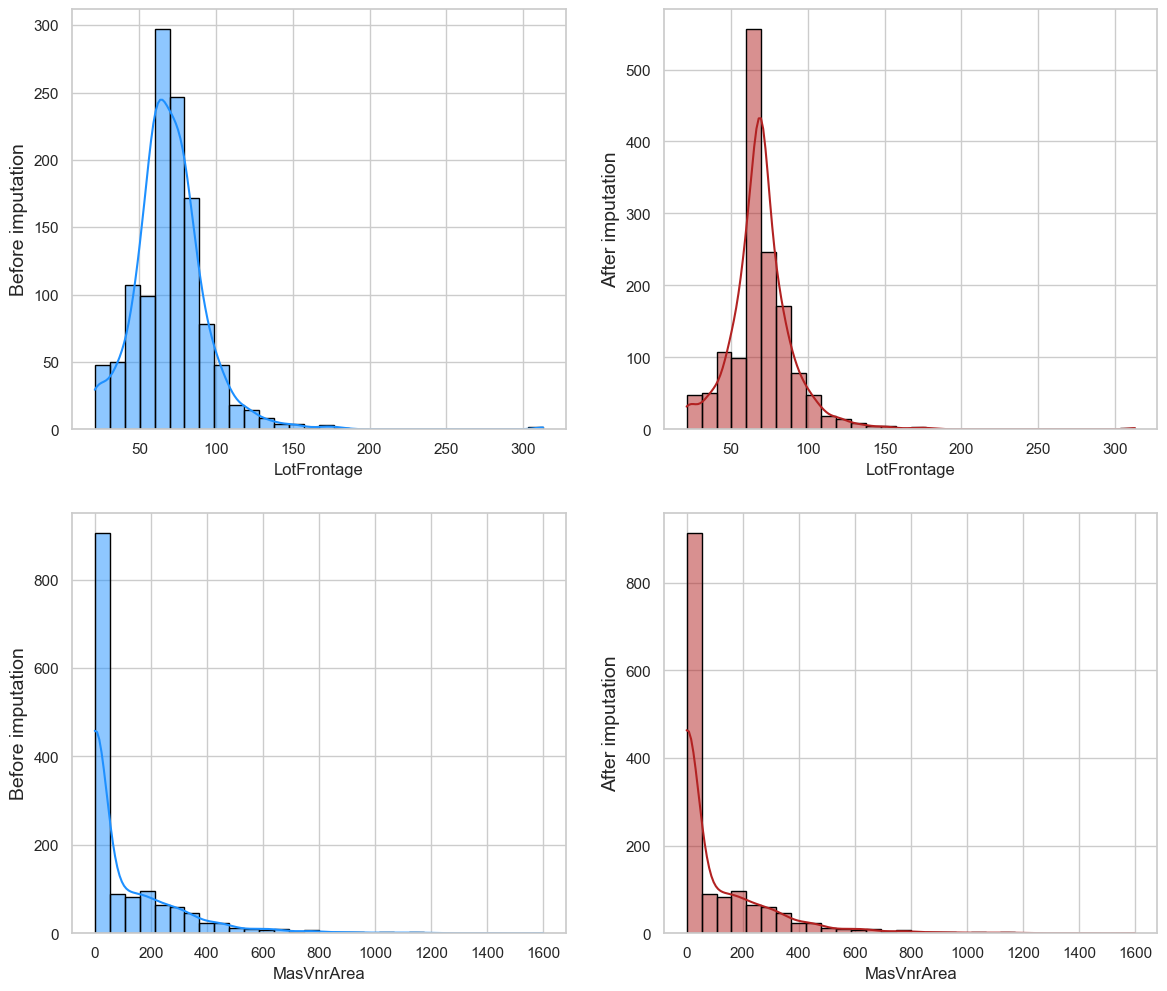

In [290]:
# Define figure parameters
sns.set(rc={"figure.figsize": (14, 12)})
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2)

# Plot the results
for feature, fig_pos in zip(["LotFrontage", "MasVnrArea"], [0, 1]):

    """Features distribution before and after imputation"""

    # before imputation
    p = sns.histplot(ax=axes[fig_pos, 0], x=df_train_num[feature],
                     kde=True, bins=30, color="dodgerblue", edgecolor="black")
    p.set_ylabel(f"Before imputation", fontsize=14)

    # after imputation
    q = sns.histplot(ax=axes[fig_pos, 1], x=df_train_imputed[feature],
                     kde=True, bins=30, color="firebrick", edgecolor="black")
    q.set_ylabel(f"After imputation", fontsize=14)

In [291]:
# Drop 'LotFrontage' from the training set
df_train_imputed.drop(["LotFrontage"], axis=1, inplace=True)

# Drop the same features from testing set 
df_test_num.drop(["LotFrontage"], axis=1, inplace=True)

df_train_imputed.head()

OverallQual  GrLivArea  YearBuilt  YearRemodAdd  TotalBsmtSF  FullBath  \
0         7.00   1,710.00   2,003.00      2,003.00       856.00      2.00   
1         6.00   1,262.00   1,976.00      1,976.00     1,262.00      2.00   
2         7.00   1,786.00   2,001.00      2,002.00       920.00      2.00   
3         7.00   1,717.00   1,915.00      1,970.00       756.00      1.00   
4         8.00   2,198.00   2,000.00      2,000.00     1,145.00      2.00   

   GarageCars  MasVnrArea  BsmtFinSF1  2ndFlrSF  Fireplaces  WoodDeckSF  \
0        2.00      196.00      706.00    854.00        0.00        0.00   
1        2.00        0.00      978.00      0.00        1.00      298.00   
2        2.00      162.00      486.00    866.00        1.00        0.00   
3        3.00        0.00      216.00    756.00        1.00        0.00   
4        3.00      350.00      655.00  1,053.00        1.00      192.00   

   OpenPorchSF  SalePrice  
0        61.00 208,500.00  
1         0.00 181,500.00  
2        42.00 223,500.00  
3        35.00 140,000.00  
4        84.00 250,000.00

Text(0, 0.5, 'Column Name\n')

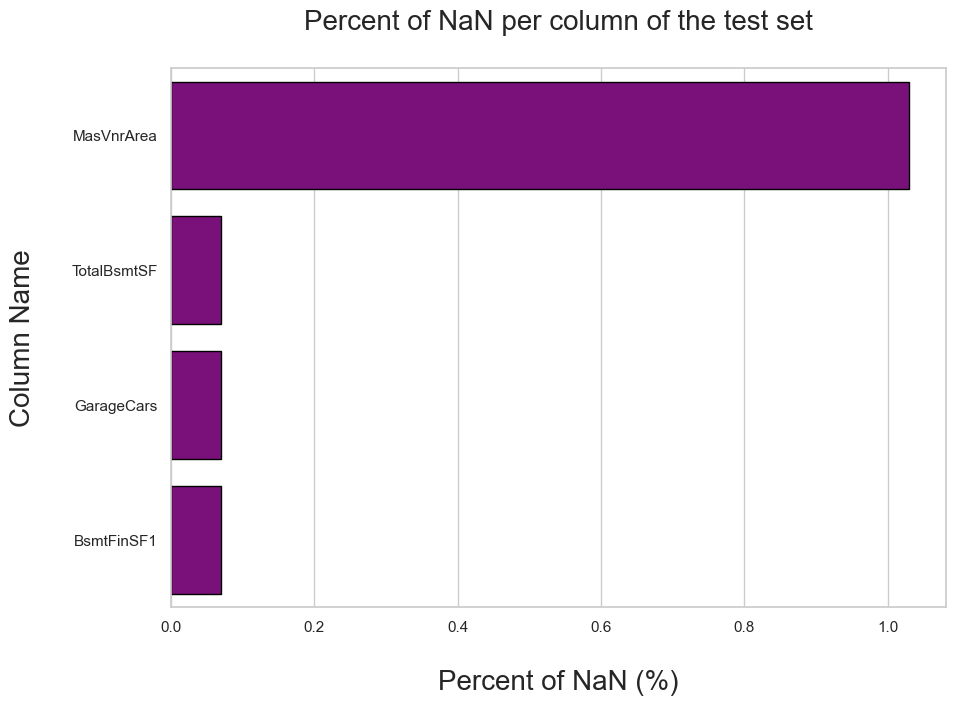

In [292]:
# Check the NaN of the test set by ploting percent of missing values per column
column_with_nan = df_test_num.columns[df_test_num.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_test_num[i].isnull().sum()*100/len(df_test_num), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="darkmagenta")

p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [293]:
# Imputation of missing values (NaNs) with SimpleImputer
my_imputer = SimpleImputer(strategy="median")
df_test_imputed = pd.DataFrame(my_imputer.fit_transform(df_test_num))
df_test_imputed.columns = df_test_num.columns

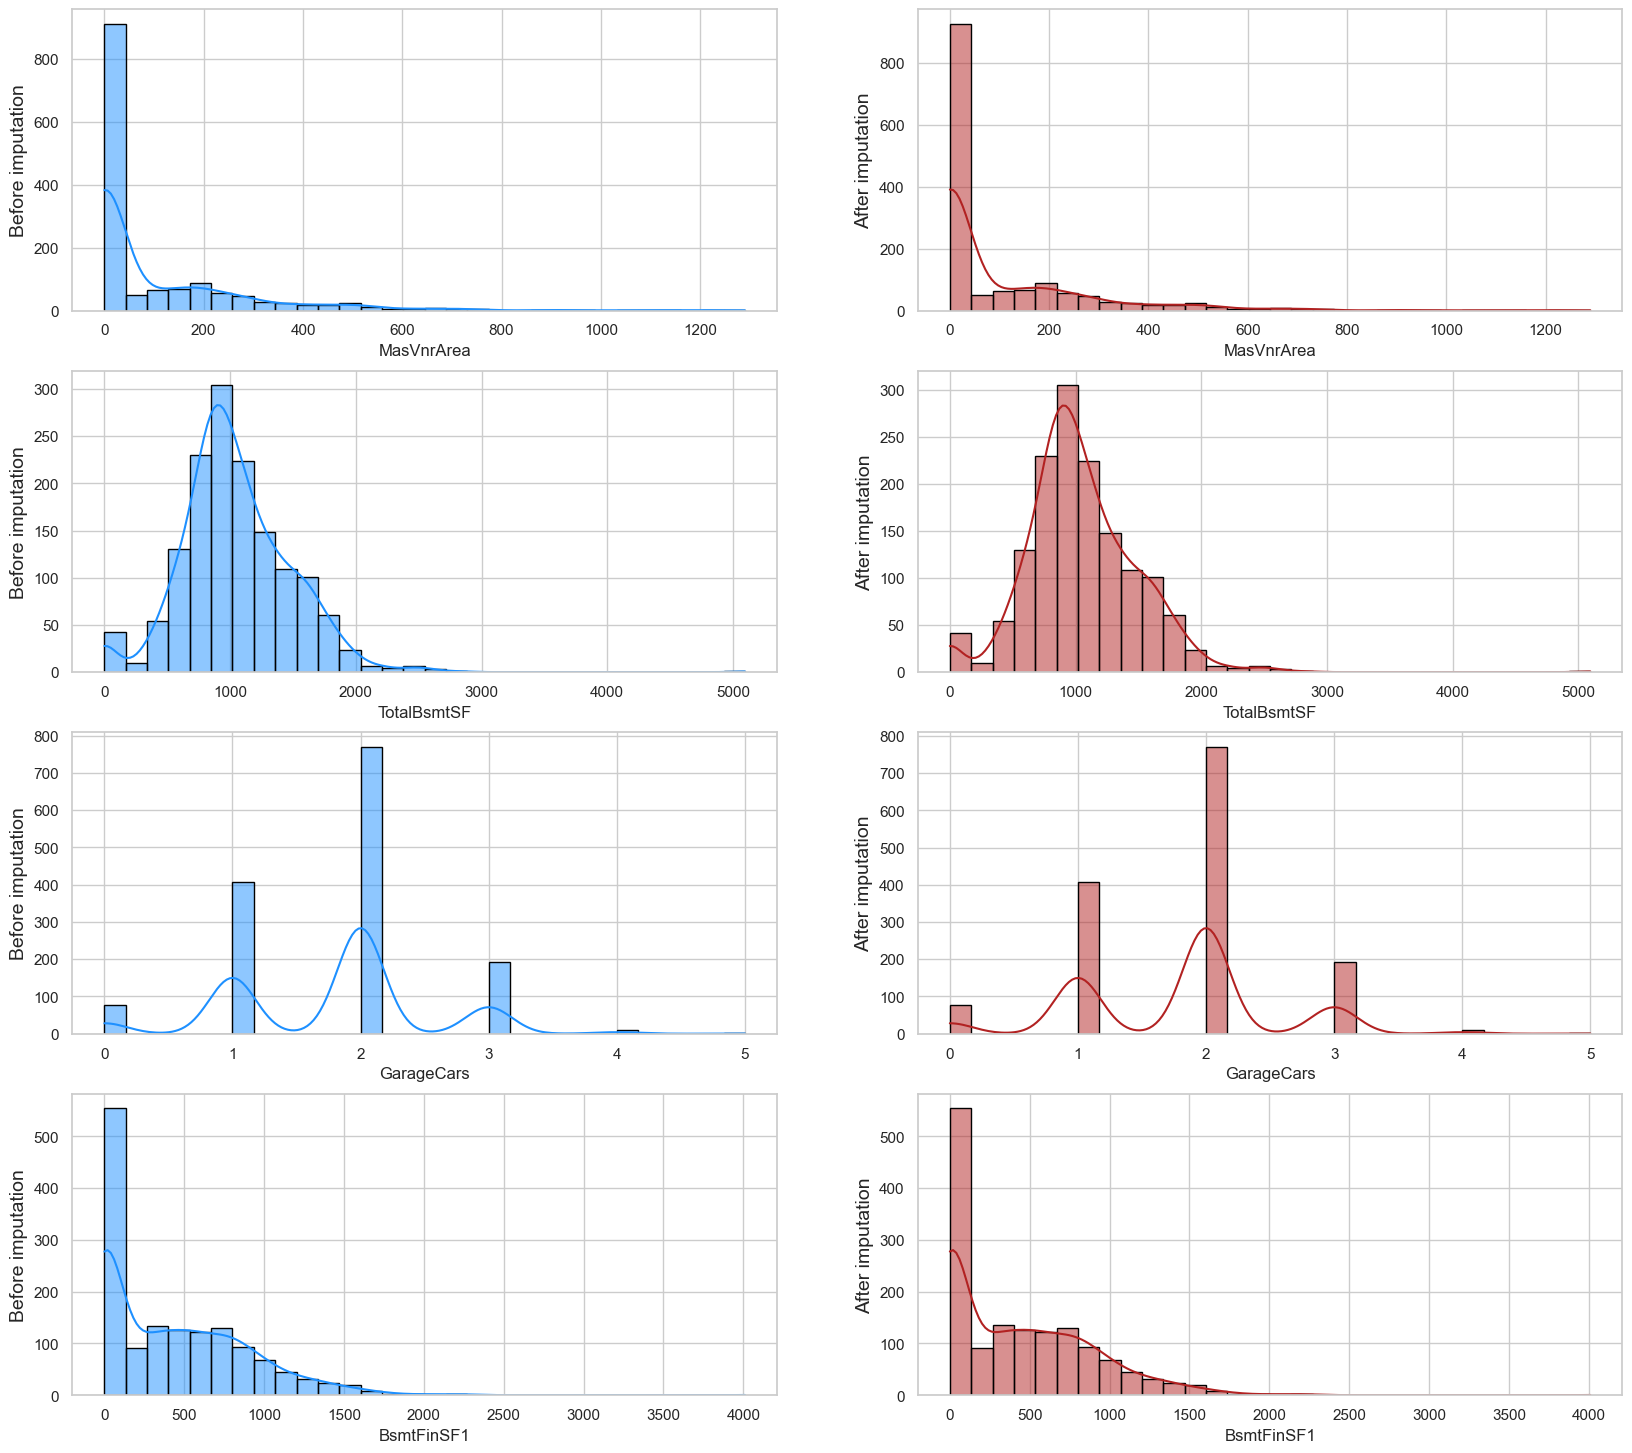

In [294]:
# Let's check the distribution of each imputed feature before and after imputation
# Define figure parameters
sns.set(rc={"figure.figsize": (20, 18)})
sns.set_style("whitegrid")
fig, axes = plt.subplots(4, 2)

# Plot the results
for feature, fig_pos in zip(tab["Column"].tolist(), range(0, 6)):

    """Features distribution before and after imputation"""

    # before imputation
    p = sns.histplot(ax=axes[fig_pos, 0], x=df_test_num[feature],
                     kde=True, bins=30, color="dodgerblue", edgecolor="black")
    p.set_ylabel(f"Before imputation", fontsize=14)

    # after imputation
    q = sns.histplot(ax=axes[fig_pos, 1], x=df_test_imputed[feature],
                     kde=True, bins=30, color="firebrick", edgecolor="black",)
    q.set_ylabel(f"After imputation", fontsize=14)

In [295]:
# Categorical to Quantitative relationship
categorical_features = [i for i in df_train.columns if df_train.dtypes[i] == "object"]
categorical_features.append("SalePrice")

# Train set
df_train_categ = df_train[categorical_features]

# Test set (-1 because test set don't have 'Sale Price')
df_test_categ = df_test[categorical_features[:-1]]

In [296]:
print(f"Training set shape (Categorical features): {df_train_categ.shape}\n")
print(f"Test set shape (Categorical features): {df_test_categ.shape}\n")

Training set shape (Categorical features): (1460, 44)

Test set shape (Categorical features): (1459, 43)



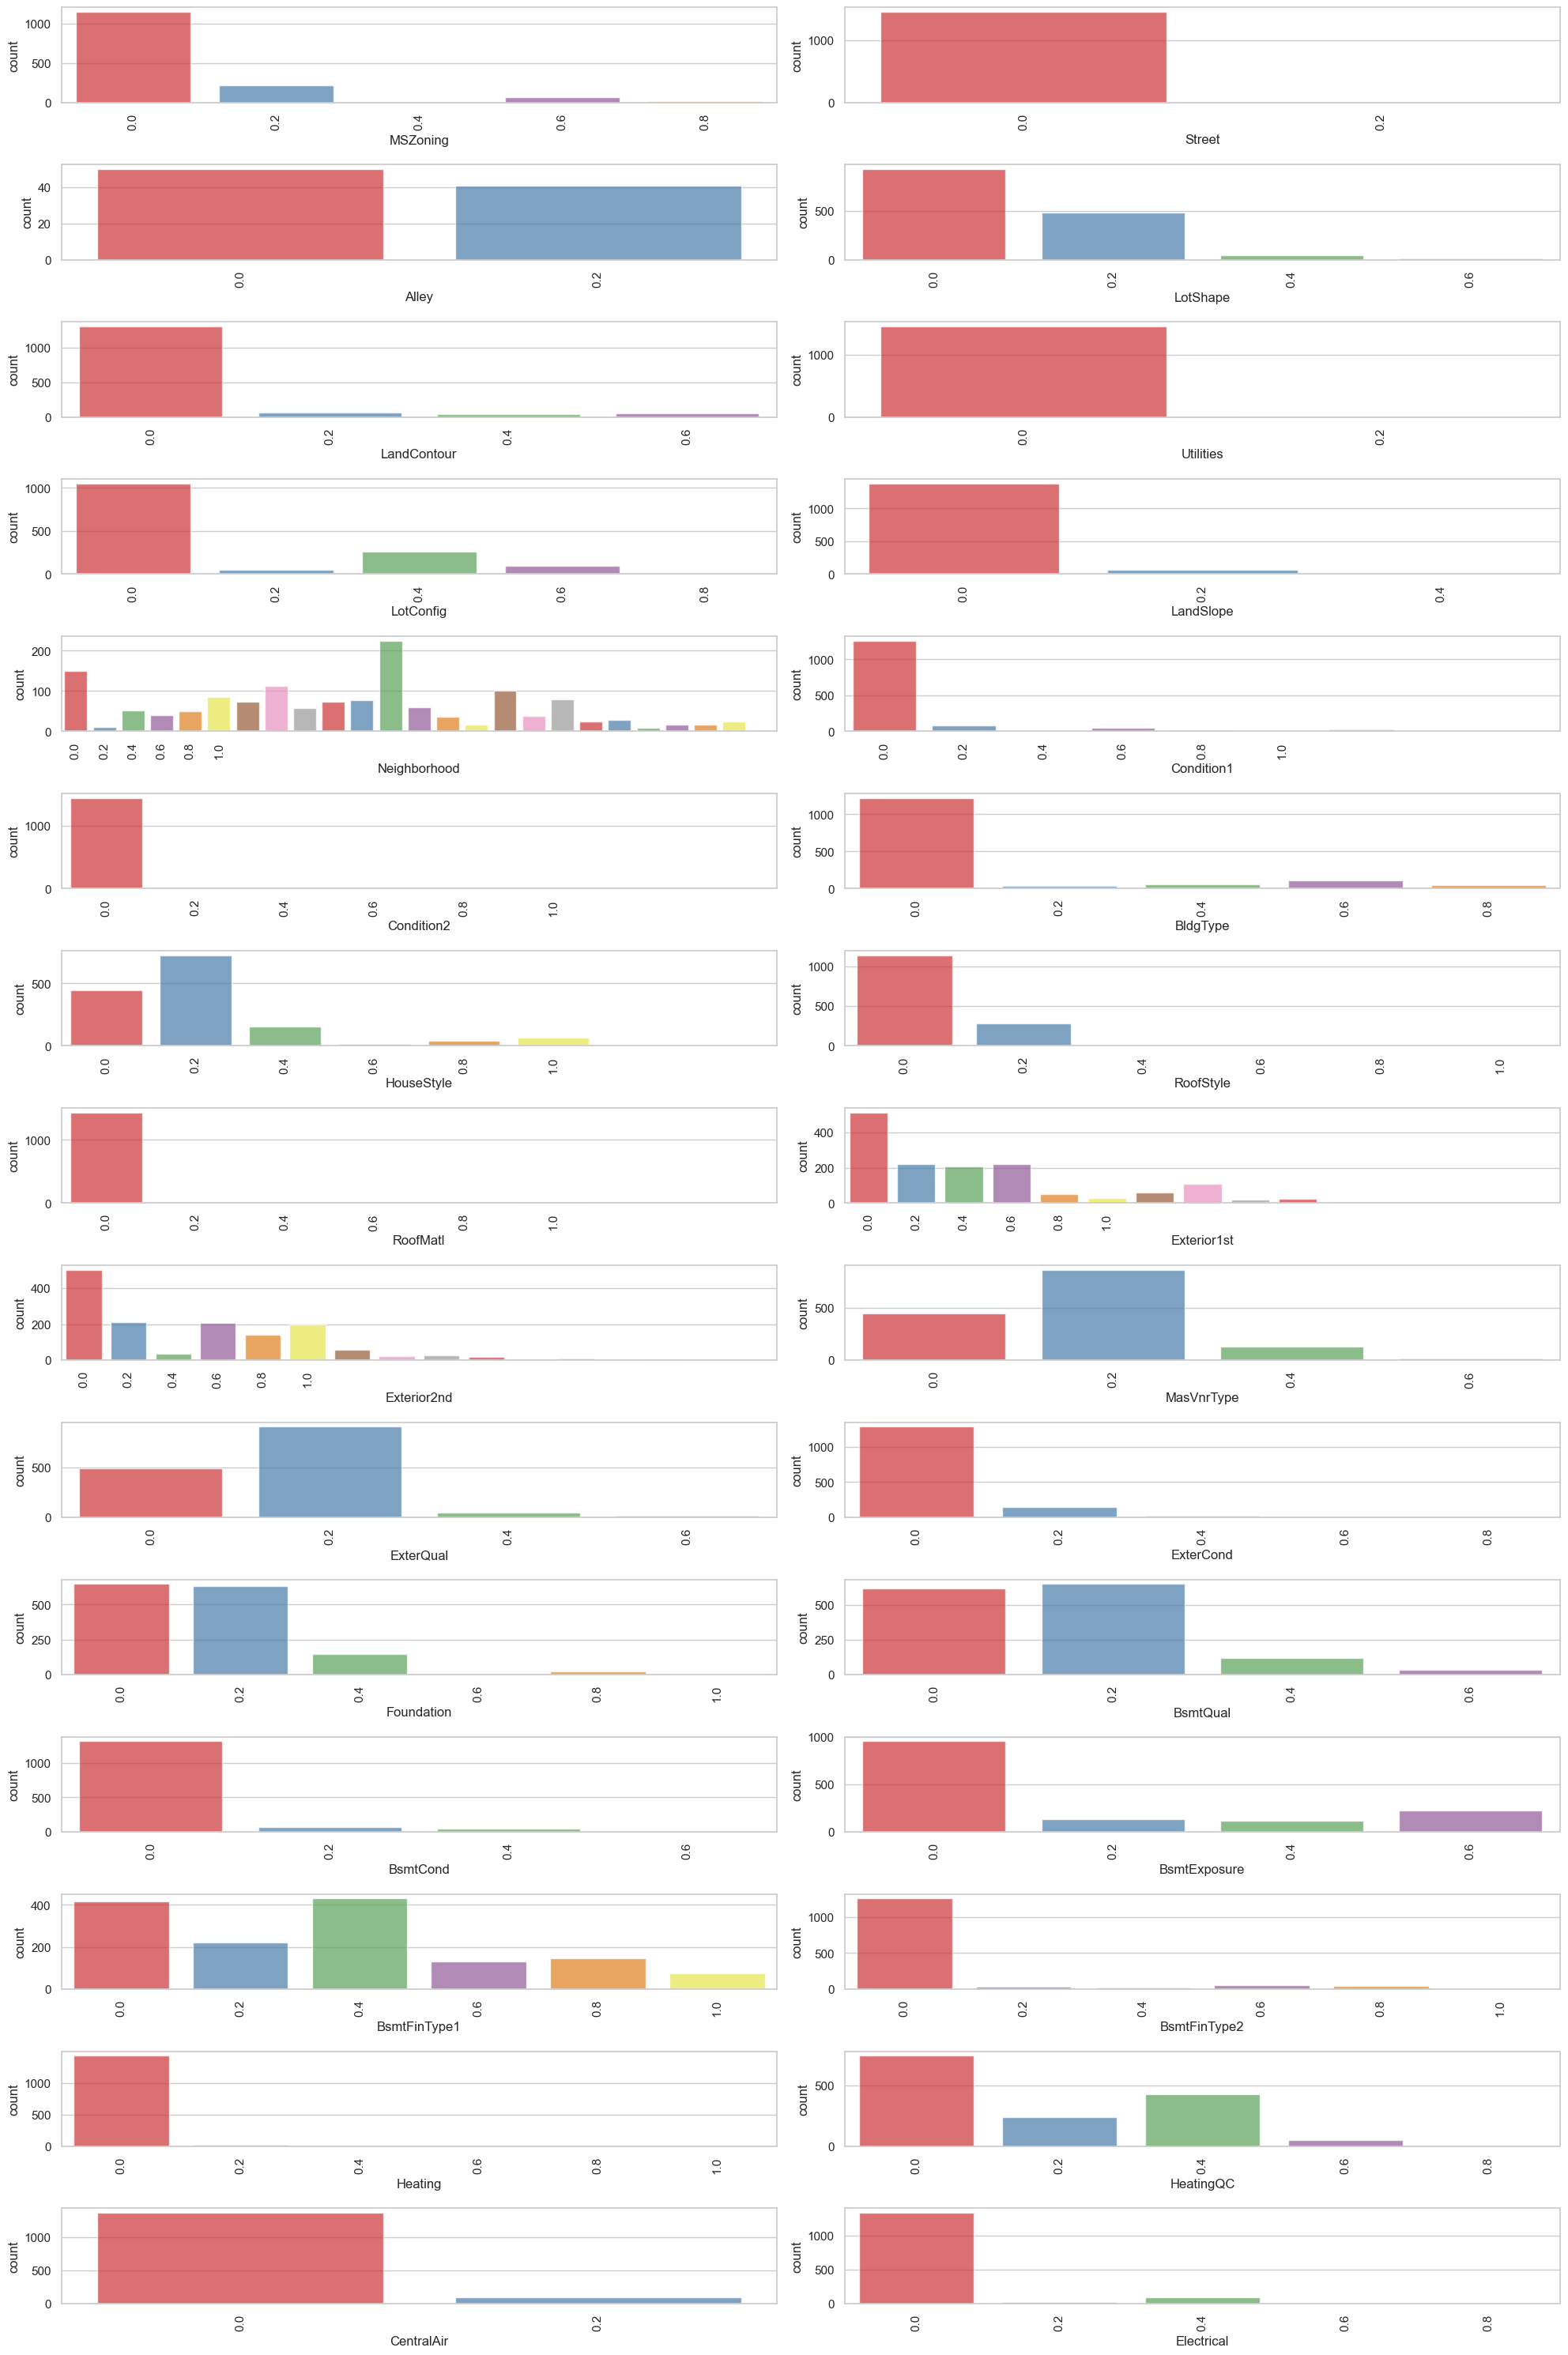

In [297]:
fig, axes = plt.subplots(round(len(df_train_categ.columns) / 3), 2, figsize=(20, 30))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(df_train_categ.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=df_train_categ.columns[i], alpha=0.7, data=df_train_categ, ax=ax, palette = "Set1")

fig.tight_layout()

In [298]:
cols_to_drop = [
    'Street',
    'LandContour',
    'Utilities',
    'LandSlope',
    'Condition2',
    'RoofMatl',
    'BsmtCond',
    'BsmtFinType2',
    'Heating',
    'CentralAir',
    'Electrical',
    'Functional',
    'GarageQual',
    'GarageCond',
    'PavedDrive'
]

# Training set
df_train_categ.drop(cols_to_drop, axis=1, inplace=True)

# Test set
df_test_categ.drop(cols_to_drop, axis=1, inplace=True)

In [299]:
print(f"Training set shape (Categorical features): {df_train_categ.shape}\n")
print(f"Test set shape (Categorical features): {df_test_categ.shape}\n")

Training set shape (Categorical features): (1460, 29)

Test set shape (Categorical features): (1459, 28)



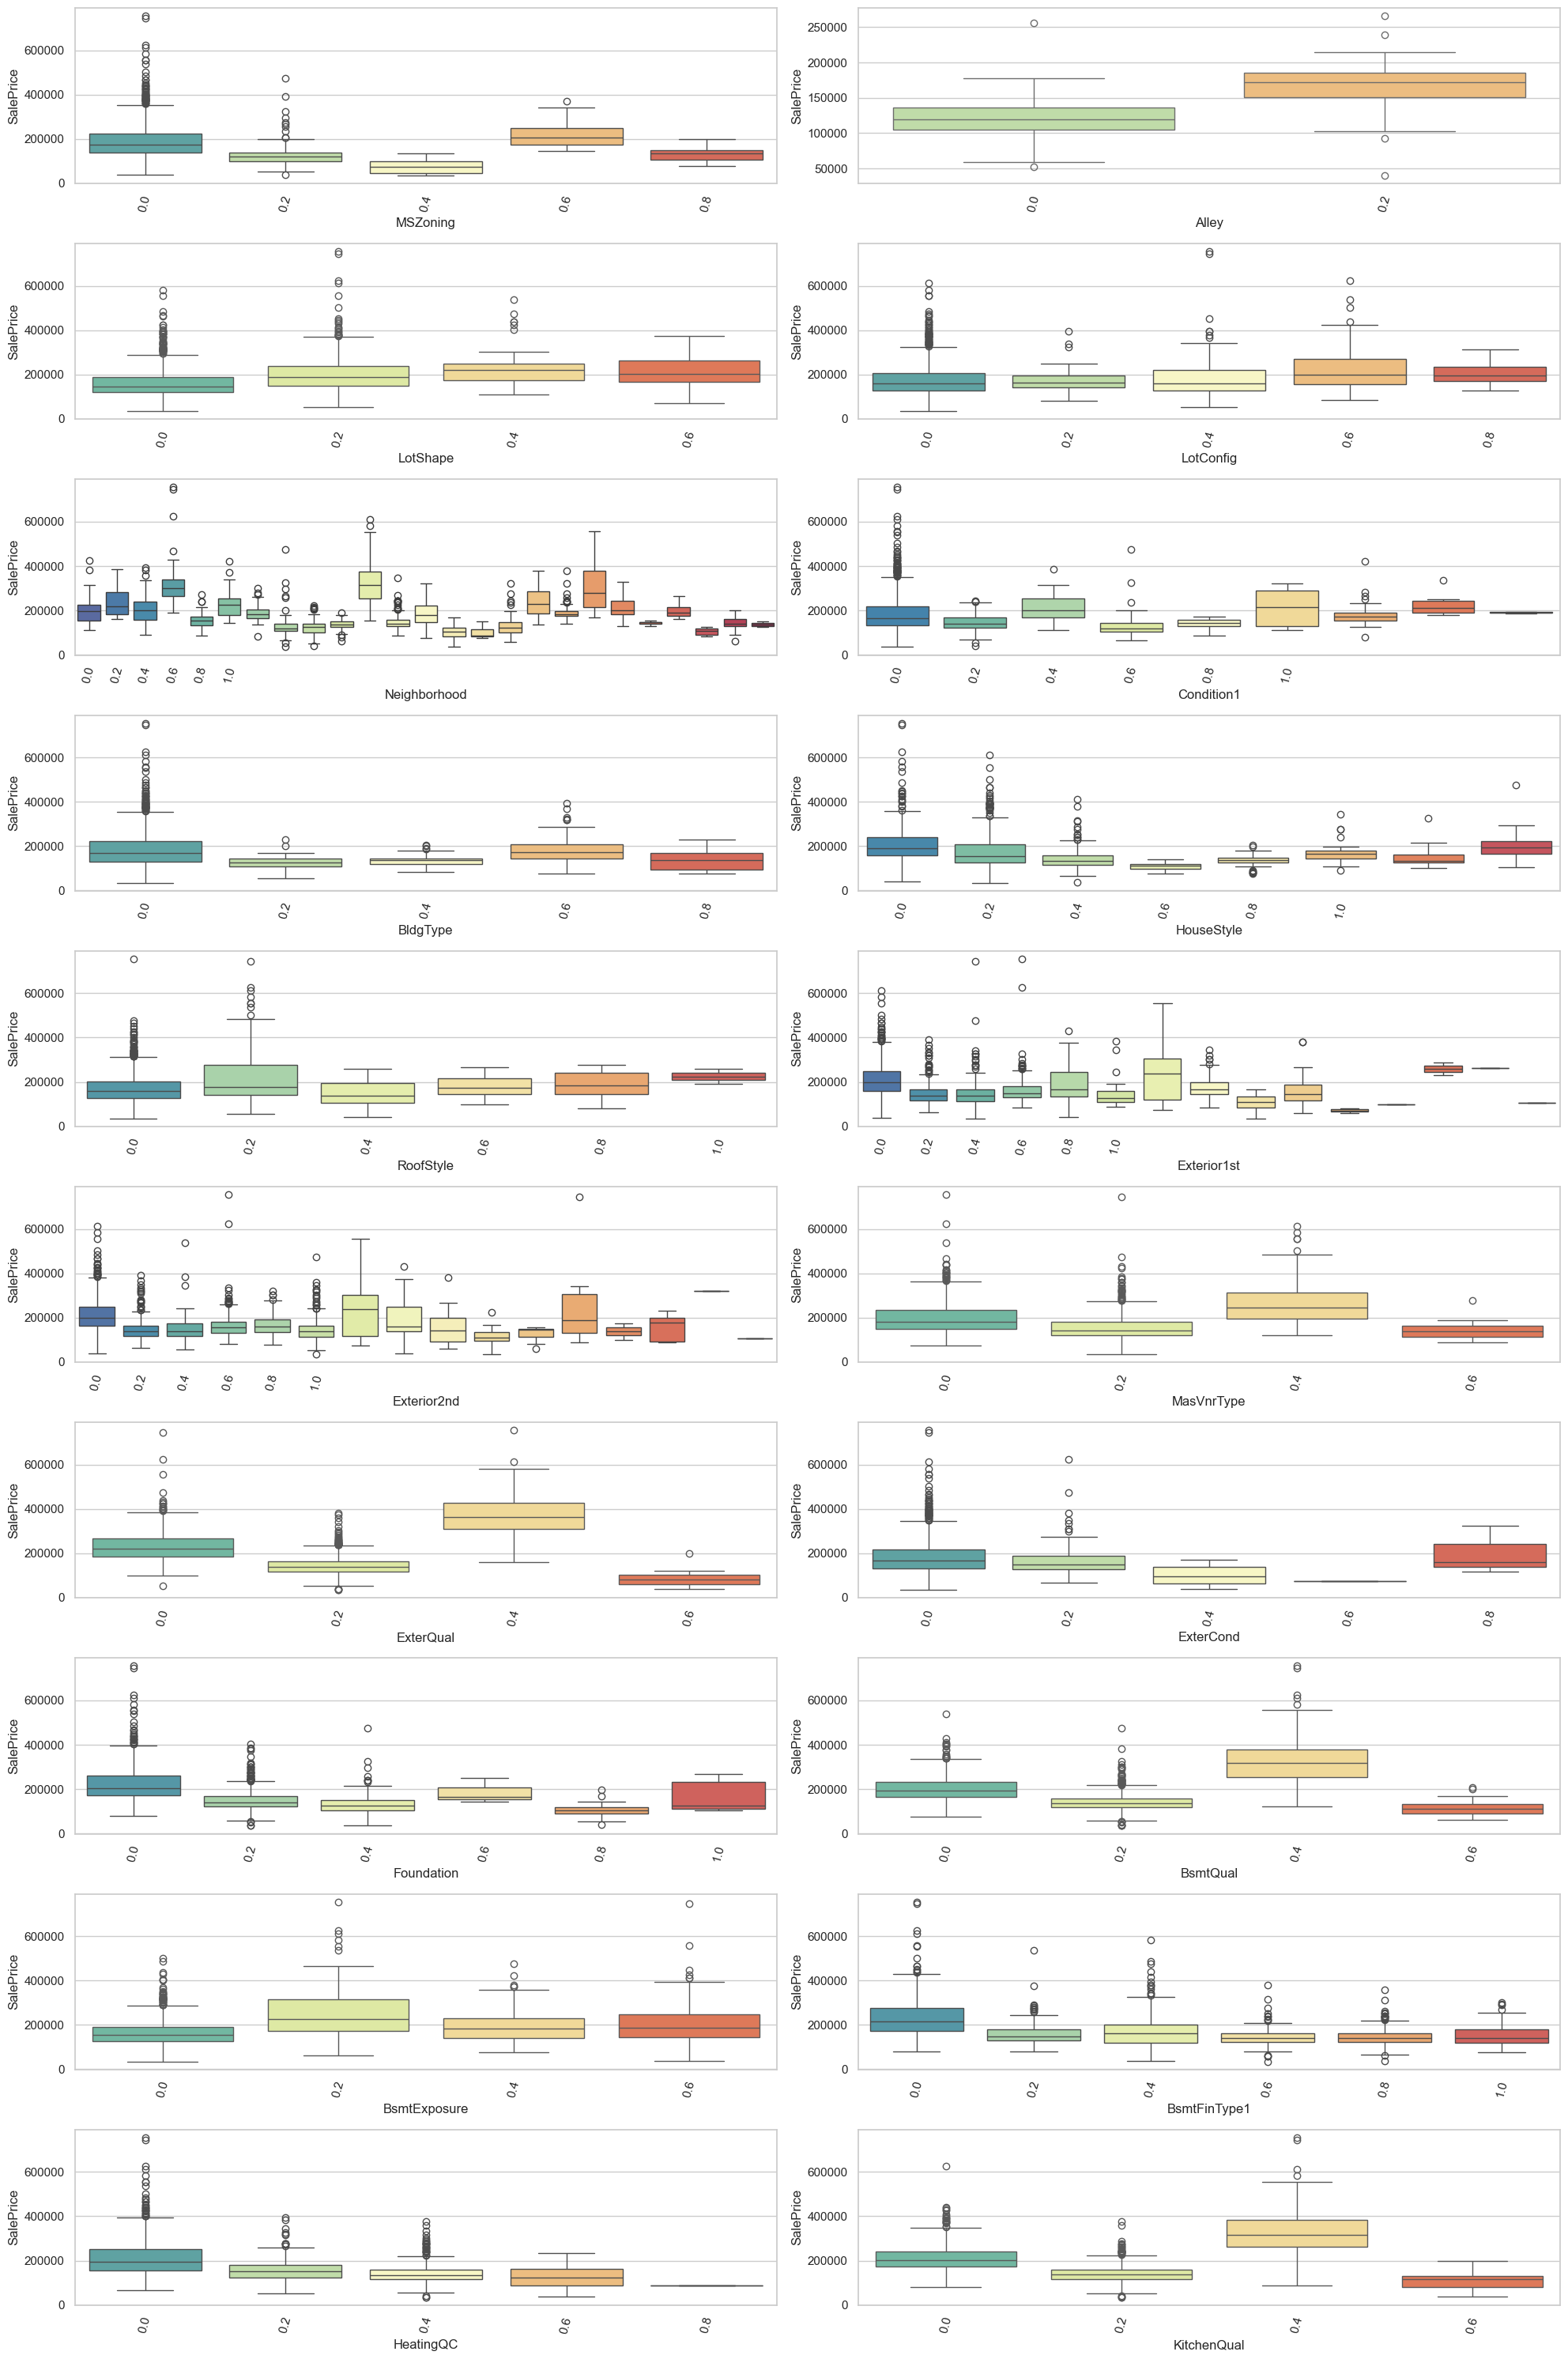

In [300]:
fig, axes = plt.subplots(
    round(len(df_train_categ.columns)/3), 2, figsize=(20, 30))

for i, ax in enumerate(fig.axes):
    # plot the variation of SalePrice in each feature
    if i < len(df_train_categ.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
        sns.boxplot(x=df_train_categ.columns[i], y="SalePrice", data=df_train_categ, ax=ax, palette="Spectral_r")

fig.tight_layout()

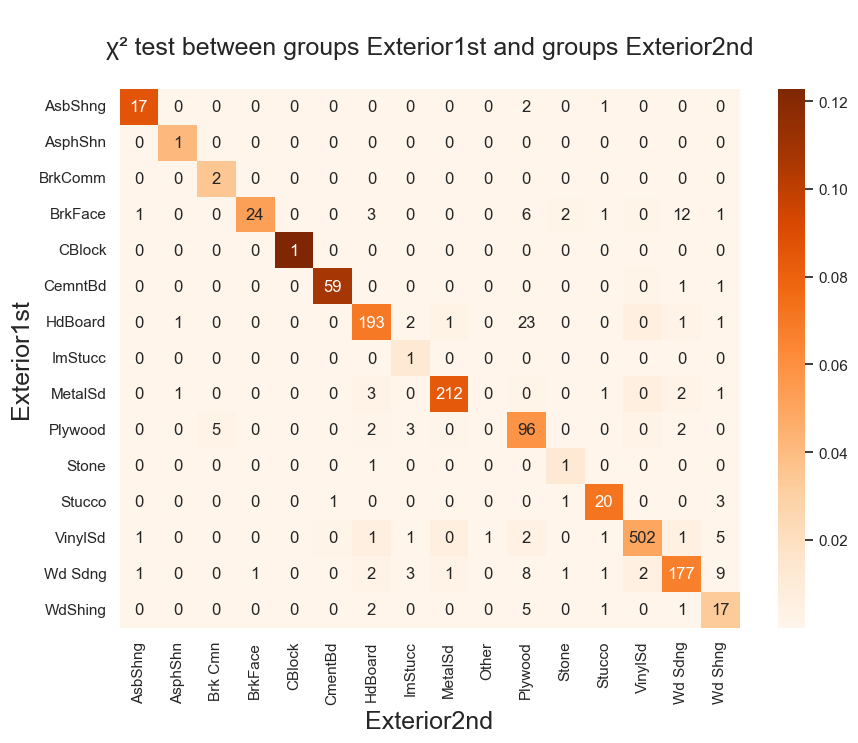

P-Value of the ChiSq Test bewteen Exterior1st and Exterior2nd is: 0.0



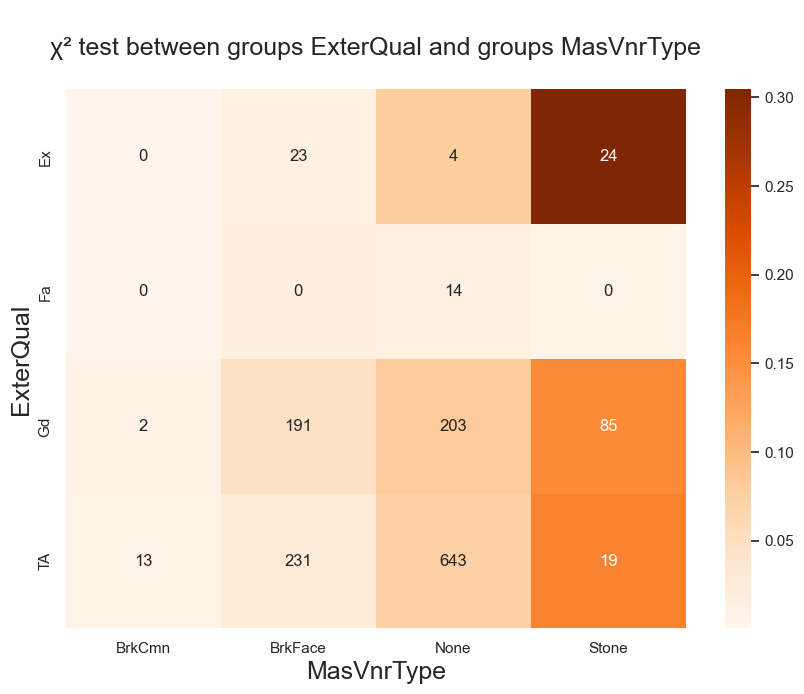

P-Value of the ChiSq Test bewteen ExterQual and MasVnrType is: 1.0187554679218715e-54



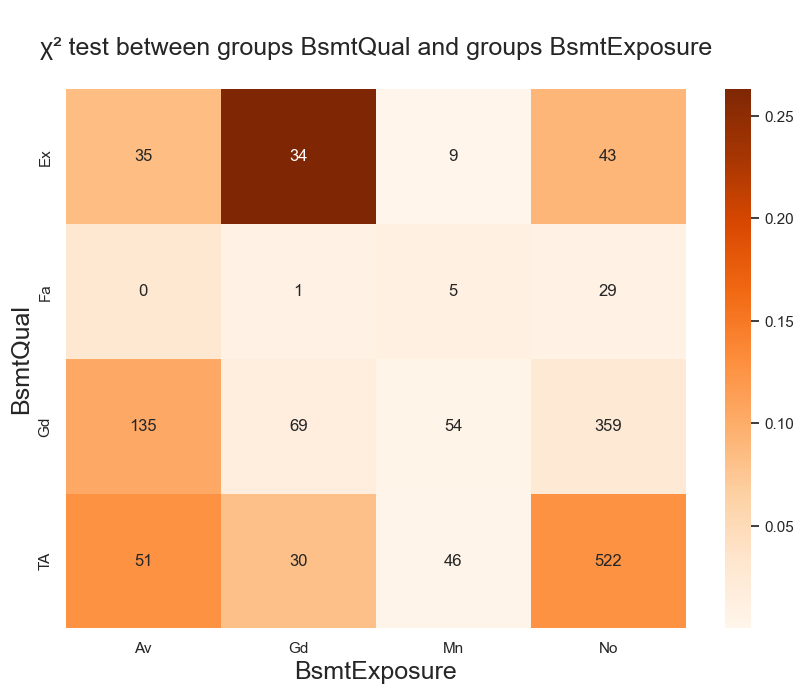

P-Value of the ChiSq Test bewteen BsmtQual and BsmtExposure is: 3.879215036512606e-32



In [301]:
# Plot contingency table

sns.set(rc={"figure.figsize": (10, 7)})

X = ["Exterior1st", "ExterQual", "BsmtQual"]
Y = ["Exterior2nd", "MasVnrType", "BsmtExposure"]

for i, j in zip(X, Y):

    # Contingency table
    cont = df_train_categ[[i, j]].pivot_table(
        index=i, columns=j, aggfunc=len, margins=True, margins_name="Total")
    tx = cont.loc[:, ["Total"]]
    ty = cont.loc[["Total"], :]
    n = len(df_train_categ)
    indep = tx.dot(ty) / n
    c = cont.fillna(0)  # Replace NaN with 0 in the contingency table
    measure = (c - indep) ** 2 / indep
    xi_n = measure.sum().sum()
    table = measure / xi_n

    # Plot contingency table
    p = sns.heatmap(table.iloc[:-1, :-1],
                    annot=c.iloc[:-1, :-1], fmt=".0f", cmap="Oranges")
    p.set_xlabel(j, fontsize=18)
    p.set_ylabel(i, fontsize=18)
    p.set_title(f"\nχ² test between groups {i} and groups {j}\n", size=18)
    plt.show()

    # Performing Chi-sq test
    CrosstabResult = pd.crosstab(
        index=df_train_categ[i], columns=df_train_categ[j])
    ChiSqResult = chi2_contingency(CrosstabResult)
    # P-Value is the Probability of H0 being True
    print(
        f"P-Value of the ChiSq Test bewteen {i} and {j} is: {ChiSqResult[1]}\n")

In [302]:
# Drop the one of each co-dependent variables
# Training set
df_train_categ.drop(Y, axis=1, inplace=True)

# Test set
df_test_categ.drop(Y, axis=1, inplace=True)

In [303]:
print(f"Training set shape (Categorical features): {df_train_categ.shape}\n")
print(f"Test set shape (Categorical features): {df_test_categ.shape}\n")

Training set shape (Categorical features): (1460, 26)

Test set shape (Categorical features): (1459, 25)



Text(0, 0.5, 'Column Name\n')

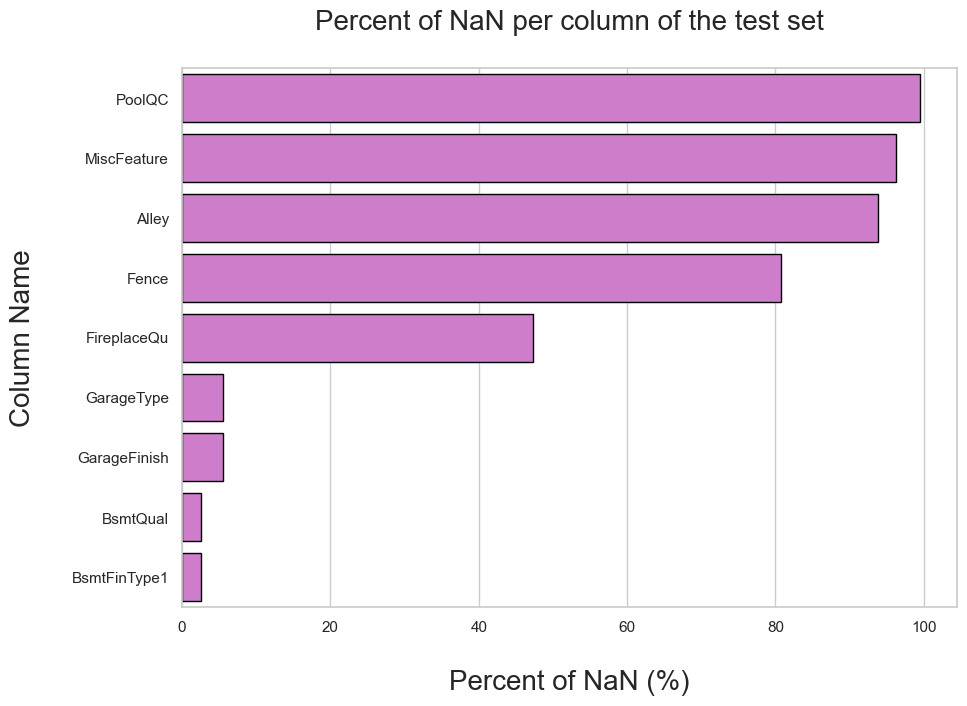

In [304]:
# Check the NaN of the test set by ploting percent of missing values per column
column_with_nan = df_train_categ.columns[df_train_categ.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_train_categ[i].isnull().sum() * 100 / len(df_train_categ), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="orchid")
p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [305]:
# Displaying the exact percentages
tab

Column  Percent_NaN
6        PoolQC        99.52
8   MiscFeature        96.30
0         Alley        93.77
7         Fence        80.75
3   FireplaceQu        47.26
4    GarageType         5.55
5  GarageFinish         5.55
1      BsmtQual         2.53
2  BsmtFinType1         2.53

In [306]:
# Drop categorical columns that have at least 30% missing values
large_na = [col for col in column_with_nan if (df_train_categ[col].isna().sum()/df_train_categ.shape[0]) > 0.3]

print("Columns to be dropped:")
print(large_na)

df_train_categ.drop(large_na, axis=1, inplace=True)

Columns to be dropped:
['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [307]:
# Fill the NaN of each feature by the corresponding modal class
categ_fill_null = {"GarageType": df_train_categ["GarageType"].mode().iloc[0],
                   "GarageFinish": df_train_categ["GarageFinish"].mode().iloc[0],
                   "BsmtQual": df_train_categ["BsmtQual"].mode().iloc[0],
                   "BsmtFinType1": df_train_categ["BsmtFinType1"].mode().iloc[0]}

df_train_categ = df_train_categ.fillna(value=categ_fill_null)


In [308]:
# Drop the same categorical columns from the test set
df_test_categ.drop(large_na, axis=1, inplace=True)

Text(0, 0.5, 'Column Name\n')

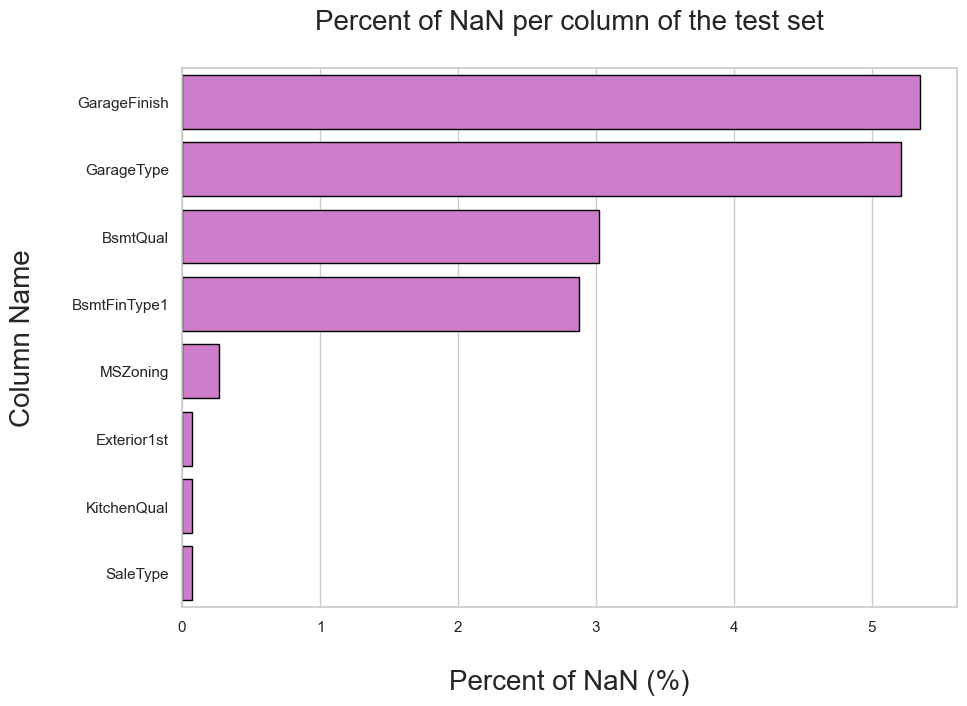

In [309]:
# Check the NaN of the test set by ploting percent of missing values per column
column_with_nan = df_test_categ.columns[df_test_categ.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_test_categ[i].isnull().sum() * 100 / len(df_test_categ), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="orchid")
p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [310]:
# Fill the NaN of each feature by the corresponding modal class

# Fill the NaN of each feature by the corresponding modal class
categ_fill_null = {"GarageType": df_test_categ["GarageType"].mode().iloc[0],
                   "GarageFinish": df_test_categ["GarageFinish"].mode().iloc[0],
                   "BsmtQual": df_test_categ["BsmtQual"].mode().iloc[0],
                   "BsmtFinType1": df_test_categ["BsmtFinType1"].mode().iloc[0],
                   "MSZoning": df_test_categ["MSZoning"].mode().iloc[0],
                   "Exterior1st": df_test_categ["Exterior1st"].mode().iloc[0],
                   "KitchenQual": df_test_categ["KitchenQual"].mode().iloc[0],
                   "SaleType": df_test_categ["SaleType"].mode().iloc[0]}

df_test_categ = df_test_categ.fillna(value=categ_fill_null)


In [311]:
print(f"Training set shape (Categorical features): {df_train_categ.shape}\n")
print(f"Test set shape (Categorical features): {df_test_categ.shape}\n")

Training set shape (Categorical features): (1460, 21)

Test set shape (Categorical features): (1459, 20)



In [312]:
# Drop the SalePrice column from the training dataset
df_train_categ.drop(["SalePrice"], axis = 1, inplace = True)

# Use get_dummies to transform the Categorical features into Binary features (Training dataset)
df_train_dummies = pd.get_dummies(df_train_categ)
df_train_dummies.head()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            0            1            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_Corner  \
0             0             0             0             1                 0   
1             0             0             0             1                 0   
2             1             0             0             0                 0   
3             1             0             0             0                 1   
4             1             0             0             0                 0   

   ...  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0  ...               0             0             0            1   
1  ...               0             0             0            1   
2  ...               0             0             0            1   
3  ...               0             0             0            1   
4  ...               0             0             0            1   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      1                      0                     0   
4                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 140 columns]

In [313]:
# Apply get_dummies to the test dataset as well
df_test_dummies = pd.get_dummies(df_test_categ)
df_test_dummies.head()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            1            0            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_Corner  \
0             0             0             0             1                 0   
1             1             0             0             0                 1   
2             1             0             0             0                 0   
3             1             0             0             0                 0   
4             1             0             0             0                 0   

   ...  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0  ...               0             0             0            1   
1  ...               0             0             0            1   
2  ...               0             0             0            1   
3  ...               0             0             0            1   
4  ...               0             0             0            1   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      0                      0                     0   
4                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     1                      0  
4                     0                     1                      0  

[5 rows x 137 columns]

For precaution, let's check if the column headings are the same in both data sets just transformed. 

In [314]:
# Check if the column headings are the same in both data sets: data_train_dummies and data_test_dummies
dif_1 = [x for x in df_train_dummies.columns if x not in df_test_dummies.columns]
print(f"Features present in df_train_categ and absent in df_test_categ: {dif_1}\n")

dif_2 = [x for x in df_test_dummies.columns if x not in df_train_dummies.columns]
print(f"Features present in df_test_categ set and absent in df_train_categ: {dif_2}")

Features present in df_train_categ and absent in df_test_categ: ['HouseStyle_2.5Fin', 'Exterior1st_ImStucc', 'Exterior1st_Stone']

Features present in df_test_categ set and absent in df_train_categ: []


In [315]:
# Drop the columns listed in dif_1 from data_train_dummies
df_train_dummies.drop(dif_1, axis=1, inplace=True)

# Check again if the column headings are the same in both data sets: data_train_dummies and data_test_dummies
dif_1 = [x for x in df_train_dummies.columns if x not in df_test_dummies.columns]
print(f"Features present in df_train_categ and absent in df_test_categ: {dif_1}\n")

dif_2 = [x for x in df_test_dummies.columns if x not in df_test_dummies.columns]
print(f"Features present in df_test_categ set and absent in df_train_categ: {dif_2}")

Features present in df_train_categ and absent in df_test_categ: []

Features present in df_test_categ set and absent in df_train_categ: []


In [316]:
print(f"Training set shape (Categorical features): {df_train_dummies.shape}\n")
print(f"Test set shape (Categorical features): {df_test_dummies.shape}\n")

Training set shape (Categorical features): (1460, 137)

Test set shape (Categorical features): (1459, 137)



In [317]:
# Training set
df_train_new = pd.concat([df_train_imputed, df_train_dummies], axis = 1)
print(f"Train set: {df_train_new.shape}")

# Test set
df_test_new = pd.concat([df_test_imputed, df_test_dummies], axis = 1)
print(f"Test set: {df_test_new.shape}")

Train set: (1460, 151)
Test set: (1459, 150)


In [318]:
# Let's handle the outliers in some predictors kept in our training set
# Outliers in "GrLivArea"
outliers1 = df_train_new[(df_train_new["GrLivArea"] > 4000) & (
    df_train_new["SalePrice"] <= 300000)].index.tolist()

# Outliers in "TotalBsmtSF"
outliers2 = df_train_new[(df_train_new["TotalBsmtSF"] > 4000) & (
    df_train_new["SalePrice"] <= 200000)].index.tolist()

# Outliers in "BsmtFinSF1"
outliers3 = df_train_new[(df_train_new["BsmtFinSF1"] > 4000)].index.tolist()

# Outliers in "OpenPorchSF"
outliers4 = df_train_new[(df_train_new["OpenPorchSF"] > 500) & (
    df_train_new["SalePrice"] <= 100000)].index.tolist()

# List of all the outliers
outliers = outliers1 + outliers2 + outliers3 + outliers4
outliers = list(set(outliers))
print(outliers)

# Drop these outlier
df_train_new = df_train_new.drop(df_train_new.index[outliers])

# Reset index
df_train_new = df_train_new.reset_index().drop("index", axis=1)

[1298, 523, 495]


In [319]:
# Convert Year of construction to the Age of the house since the construction
df_train_new["AgeSinceConst"] = (df_train_new["YearBuilt"].max() - df_train_new["YearBuilt"])

df_test_new["AgeSinceConst"] = (df_test_new["YearBuilt"].max() - df_test_new["YearBuilt"])

# Drop "YearBuilt"
df_train_new.drop(["YearBuilt"], axis=1, inplace=True)
df_test_new.drop(["YearBuilt"], axis=1, inplace=True)

In [320]:
# Convert Year of remodeling to the Age of the house since the remodeling
df_train_new["AgeSinceRemod"] = (df_train_new["YearRemodAdd"].max() - df_train_new["YearRemodAdd"])

df_test_new["AgeSinceRemod"] = (df_test_new["YearRemodAdd"].max() - df_test_new["YearRemodAdd"])

# Drop "YearRemodAdd"
df_train_new.drop(["YearRemodAdd"], axis=1, inplace=True)
df_test_new.drop(["YearRemodAdd"], axis=1, inplace=True)

In [321]:
df_test_new.head()

OverallQual  GrLivArea  TotalBsmtSF  FullBath  GarageCars  MasVnrArea  \
0         5.00     896.00       882.00      1.00        1.00        0.00   
1         6.00   1,329.00     1,329.00      1.00        1.00      108.00   
2         5.00   1,629.00       928.00      2.00        2.00        0.00   
3         6.00   1,604.00       926.00      2.00        2.00       20.00   
4         8.00   1,280.00     1,280.00      2.00        2.00        0.00   

   BsmtFinSF1  2ndFlrSF  Fireplaces  WoodDeckSF  ...  SaleType_Oth  \
0      468.00      0.00        0.00      140.00  ...             0   
1      923.00      0.00        0.00      393.00  ...             0   
2      791.00    701.00        1.00      212.00  ...             0   
3      602.00    678.00        1.00      360.00  ...             0   
4      263.00      0.00        0.00        0.00  ...             0   

   SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0            1                      0                      0   
1            1                      0                      0   
2            1                      0                      0   
3            1                      0                      0   
4            1                      0                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     1   
4                     0                     0                     1   

   SaleCondition_Partial  AgeSinceConst  AgeSinceRemod  
0                      0          49.00          49.00  
1                      0          52.00          52.00  
2                      0          13.00          12.00  
3                      0          12.00          12.00  
4                      0          18.00          18.00  

[5 rows x 150 columns]

In [322]:
continuous_features = ["OverallQual", "TotalBsmtSF", "GrLivArea", "OpenPorchSF", "BsmtFinSF1",
                       "FullBath", "GarageCars","MasVnrArea", "Fireplaces", "AgeSinceConst", "AgeSinceRemod"]
df_skew_verify = df_train_new.loc[:, continuous_features]
df_skew_verify.head()

OverallQual  TotalBsmtSF  GrLivArea  OpenPorchSF  BsmtFinSF1  FullBath  \
0         7.00       856.00   1,710.00        61.00      706.00      2.00   
1         6.00     1,262.00   1,262.00         0.00      978.00      2.00   
2         7.00       920.00   1,786.00        42.00      486.00      2.00   
3         7.00       756.00   1,717.00        35.00      216.00      1.00   
4         8.00     1,145.00   2,198.00        84.00      655.00      2.00   

   GarageCars  MasVnrArea  Fireplaces  AgeSinceConst  AgeSinceRemod  
0        2.00      196.00        0.00           7.00           7.00  
1        2.00        0.00        1.00          34.00          34.00  
2        2.00      162.00        1.00           9.00           8.00  
3        3.00        0.00        1.00          95.00          40.00  
4        3.00      350.00        1.00          10.00          10.00

In [323]:
df_skew_verify = df_train_new.loc[:, continuous_features]

# Select features with absolute Skew higher than 0.5
skew_ft = []

for i in continuous_features:
    # list of skew for each corresponding feature
    skew_ft.append(abs(df_skew_verify[i].skew()))

df_skewed = pd.DataFrame({"Columns": continuous_features, "Abs_Skew": skew_ft})


sk_features = df_skewed[df_skewed["Abs_Skew"] > 0.5]["Columns"].tolist()
print(f"List of skewed features: {sk_features}")

List of skewed features: ['TotalBsmtSF', 'GrLivArea', 'OpenPorchSF', 'BsmtFinSF1', 'MasVnrArea', 'Fireplaces', 'AgeSinceConst', 'AgeSinceRemod']


In [324]:
# Log transformation of the skewed features
for i in sk_features:
    # loop over i (features) to calculate Log of surfaces
    # Training set
    df_train_new[i] = np.log((df_train_new[i])+1)
    
    # Test set
    df_test_new[i] = np.log((df_test_new[i])+1)

In [325]:
# Log transformation of the target variable "SalePrice"
df_train_new["SalePriceLog"] = np.log(df_train_new.SalePrice)

# Drop the original SalePrice
df_train_new.drop(["SalePrice"], axis=1, inplace=True)

In [326]:
df_train_new

OverallQual  GrLivArea  TotalBsmtSF  FullBath  GarageCars  MasVnrArea  \
0            7.00       7.44         6.75      2.00        2.00        5.28   
1            6.00       7.14         7.14      2.00        2.00        0.00   
2            7.00       7.49         6.83      2.00        2.00        5.09   
3            7.00       7.45         6.63      1.00        3.00        0.00   
4            8.00       7.70         7.04      2.00        3.00        5.86   
...           ...        ...          ...       ...         ...         ...   
1452         6.00       7.41         6.86      2.00        2.00        0.00   
1453         6.00       7.64         7.34      2.00        2.00        4.79   
1454         7.00       7.76         7.05      2.00        1.00        0.00   
1455         5.00       6.98         6.98      1.00        1.00        0.00   
1456         5.00       7.14         7.14      1.00        1.00        0.00   

      BsmtFinSF1  2ndFlrSF  Fireplaces  WoodDeckSF  ...  SaleType_WD  \
0           6.56    854.00        0.00        0.00  ...            1   
1           6.89      0.00        0.69      298.00  ...            1   
2           6.19    866.00        0.69        0.00  ...            1   
3           5.38    756.00        0.69        0.00  ...            1   
4           6.49  1,053.00        0.69      192.00  ...            1   
...          ...       ...         ...         ...  ...          ...   
1452        0.00    694.00        0.69        0.00  ...            1   
1453        6.67      0.00        1.10      349.00  ...            1   
1454        5.62  1,152.00        1.10        0.00  ...            1   
1455        3.91      0.00        0.00      366.00  ...            1   
1456        6.72      0.00        0.00      736.00  ...            1   

      SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                         0                      0                     0   
1                         0                      0                     0   
2                         0                      0                     0   
3                         1                      0                     0   
4                         0                      0                     0   
...                     ...                    ...                   ...   
1452                      0                      0                     0   
1453                      0                      0                     0   
1454                      0                      0                     0   
1455                      0                      0                     0   
1456                      0                      0                     0   

      SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  \
0                        0                     1                      0   
1                        0                     1                      0   
2                        0                     1                      0   
3                        0                     0                      0   
4                        0                     1                      0   
...                    ...                   ...                    ...   
1452                     0                     1                      0   
1453                     0                     1                      0   
1454                     0                     1                      0   
1455                     0                     1                      0   
1456                     0                     1                      0   

      AgeSinceConst  AgeSinceRemod  SalePriceLog  
0              2.08           2.08         12.25  
1              3.56           3.56         12.11  
2              2.30           2.20         12.32  
3              4.56           3.71         11.85  
4              2.40           2.40         12.43  
...             ...            ...           ...  
1452           2.48  

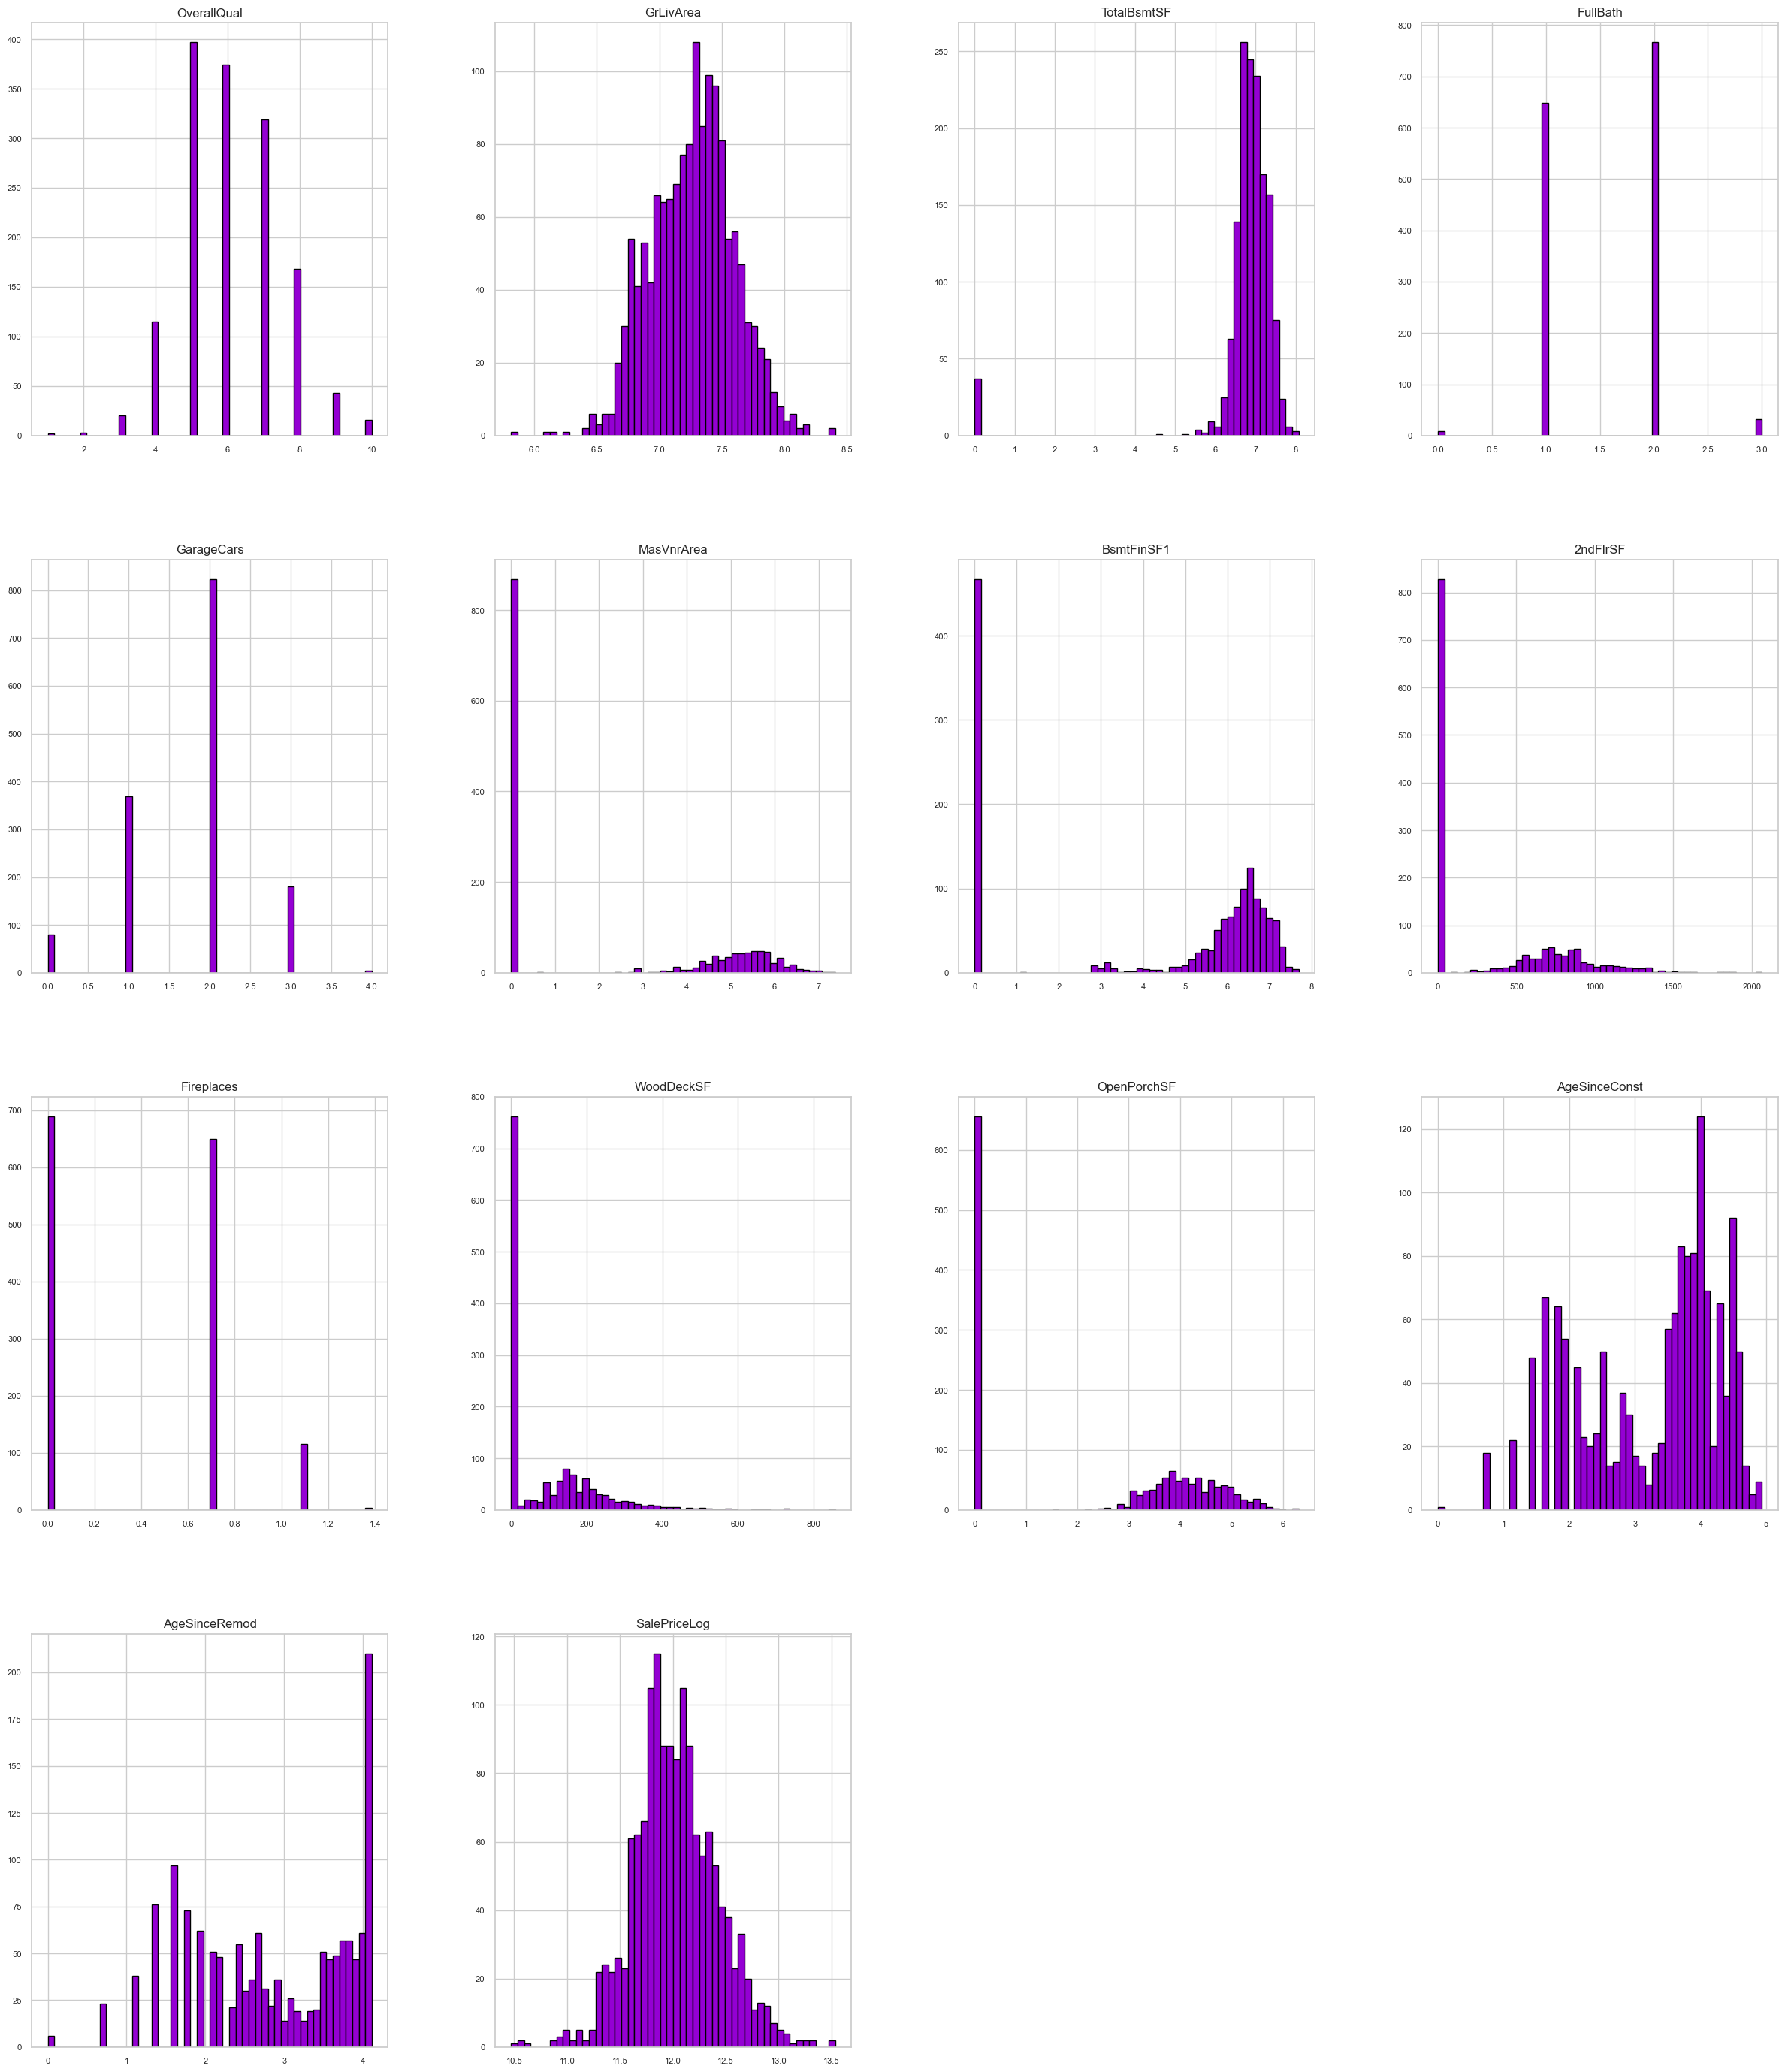

In [327]:
numerical_cols_new = [cname for cname in df_train_new.columns if 
                      df_train_new[cname].dtype in ['int64', 'float64']]

df_train_new_num = df_train_new[numerical_cols_new].copy()

# Plot the distribution of all the numerical features
fig_ = df_train_new_num.hist(figsize=(30, 35), bins=50, color="darkviolet",
                               edgecolor="black", xlabelsize=8, ylabelsize=8)

In [328]:
# Extract the features (X) and the target (y)
# Features (X)
X = df_train_new[[i for i in list(
    df_train_new.columns) if i != "SalePriceLog"]]
print(X.shape)

# Target (y)
y = df_train_new.loc[:, "SalePriceLog"]
print(y.shape)

(1457, 150)
(1457,)


In [329]:
# Split into X_train and X_test (by stratifying on y)
# Stratify on a continuous variable by splitting it in bins
# Create the bins.
bins = np.linspace(0, len(y), 150)
y_binned = np.digitize(y, bins)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y_binned, shuffle=True)
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"\nX_test:{X_test.shape}\ny_test:{y_test.shape}")

X_train:(1165, 150)
y_train:(1165,)

X_test:(292, 150)
y_test:(292,)


In [330]:
from sklearn import preprocessing

# Standardize the data
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)
# The same standardization is applied for df_test_new
df_test_new = std_scale.transform(df_test_new)


# The output of standardization is a vector. Let's turn it into a table
# Convert X, y and test data into dataframe
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
df_test_new = pd.DataFrame(df_test_new, columns=X.columns)

y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index().drop("index", axis=1)

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index().drop("index", axis=1)

In [331]:
Selected_Features = []


def backward_regression(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression 

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_in -- pvalue threshold of features to keep
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling 
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
backward_regression(X_train, y_train)

worst_feature : HeatingQC_Gd, 0.9892729617333936 
worst_feature : HouseStyle_2.5Unf, 0.986941473687645 
worst_feature : Condition1_RRAn, 0.9779137611337569 
worst_feature : MasVnrArea, 0.9694715796724205 
worst_feature : SaleType_Oth, 0.9528755438026455 
worst_feature : Neighborhood_Gilbert, 0.9380712692333966 
worst_feature : Exterior1st_AsphShn, 0.935382144308248 
worst_feature : Exterior1st_WdShing, 0.9570229304407712 
worst_feature : SaleType_Con, 0.9296249424399233 
worst_feature : Neighborhood_Somerst, 0.9042274366361107 
worst_feature : Condition1_PosA, 0.895724904280816 
worst_feature : Neighborhood_Blueste, 0.877195773251161 
worst_feature : HouseStyle_1.5Fin, 0.8541769080411616 
worst_feature : RoofStyle_Hip, 0.8502741550038999 
worst_feature : Neighborhood_CollgCr, 0.8499799703549764 
worst_feature : Neighborhood_Mitchel, 0.8962772273227635 
worst_feature : Condition1_PosN, 0.8131777066534362 
worst_feature : LotShape_Reg, 0.7761237887288216 
worst_feature : Foundation_PConc

In [332]:
# Keep the selected features only
X_train = X_train.loc[:, Selected_Features[0]]
X_test = X_test.loc[:, Selected_Features[0]]
df_test_new = df_test_new.loc[:, Selected_Features[0]]

In [333]:
# Here I calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X_train.values, i) for i in range(X_train.shape[1])]

# VIF results in a table
vif["features"] = X_train.columns
vif.round(1)

VIF Factor               features
0         3.80            OverallQual
1         3.20              GrLivArea
2         1.40            TotalBsmtSF
3         2.10             GarageCars
4        19.40             BsmtFinSF1
5         1.50             Fireplaces
6         1.20             WoodDeckSF
7         1.20       MSZoning_C (all)
8         1.60            MSZoning_FV
9         1.90            MSZoning_RL
10        1.10           LotShape_IR2
11        1.10      LotConfig_CulDSac
12        1.20   Neighborhood_BrkSide
13        1.10   Neighborhood_ClearCr
14        1.20   Neighborhood_Crawfor
15        1.20   Neighborhood_Edwards
16        1.20   Neighborhood_NoRidge
17        1.70   Neighborhood_NridgHt
18        1.20   Neighborhood_StoneBr
19        1.10   Neighborhood_Veenker
20        1.10        Condition1_Norm
21        1.50          BldgType_1Fam
22        1.30         BldgType_Twnhs
23        2.00      HouseStyle_1Story
24        1.30      HouseStyle_SFoyer
25        1.20        HouseStyle_SLvl
26        1.10    Exterior1st_BrkComm
27        1.10    Exterior1st_BrkFace
28        1.10    Exterior1st_MetalSd
29        1.00           ExterCond_Ex
30        1.20           ExterCond_Fa
31        1.10           ExterCond_Po
32        1.60      Foundation_BrkTil
33        1.10       Foundation_Stone
34        1.90            BsmtQual_Ex
35       18.80       BsmtFinType1_Unf
36        1.80           HeatingQC_Ex
37        1.10           HeatingQC_Fa
38        1.60         KitchenQual_Ex
39        1.90         KitchenQual_TA
40        1.20         SaleType_ConLD
41        1.50            SaleType_WD
42        1.10  SaleCondition_Abnorml
43        1.00   SaleCondition_Family
44        5.50          AgeSinceConst
45        2.90          AgeSinceRemod

In [ ]:
# Select features with high VIF
high_vif_list = vif[vif["VIF Factor"] > 10]["features"].tolist()

if len(high_vif_list) == 0:
    # print empty list if low multicolinearity
    print(f"None of the features have a high multicollinearity")
else:
    # print list of features with high multicolinearity
    print(f"List of features with high multicollinearity: {high_vif_list}")

In [335]:
# Drop features with high multicollinearity from X_train, X_test and df_test_new
X_train.drop(high_vif_list, axis=1, inplace=True)

X_test.drop(high_vif_list, axis=1, inplace=True)

df_test_new.drop(high_vif_list, axis=1, inplace=True)

In [336]:
X_constant = sm.add_constant(X_train)

model = sm.OLS(y_train, X_constant)
lr = model.fit()

# Cook distance
np.set_printoptions(suppress=True)

# Create an instance of influence
influence = lr.get_influence()

# Get Cook's distance for each observation
cooks = influence.cooks_distance

# Result as a dataframe
cook_df = pd.DataFrame({"Cook_Distance": cooks[0], "p_value": cooks[1]})
cook_df.head()

Cook_Distance  p_value
0           0.00     1.00
1           0.00     1.00
2           0.00     1.00
3           0.00     1.00
4           0.00     1.00

In [337]:
# Remove the influential observation from X_train and y_train
influent_observation = cook_df[cook_df["p_value"] < 0.05].index.tolist()
print(f"Influential observations dropped: {influent_observation}")

# Drop these obsrevations
X_train = X_train.drop(X_train.index[influent_observation])
y_train = y_train.drop(y_train.index[influent_observation])

Influential observations dropped: []


# 模型

In [340]:
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [342]:
model_lin = LinearRegression()
model_ridge = Ridge(alpha = 0.001)
model_lasso = Lasso(alpha = 0.001)
model_tree = DecisionTreeRegressor()
model_ran = RandomForestRegressor()

In [343]:
from sklearn.metrics import mean_squared_error, r2_score

# Define a function for each metric
# R²
def rsqr_score(test, pred):
    """Calculate R squared score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        R squared score 
    """
    r2_ = r2_score(test, pred)
    return r2_


# RMSE
def rmse_score(test, pred):
    """Calculate Root Mean Square Error score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        Root Mean Square Error score
    """
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_


# Print the scores
def print_score(test, pred, model):
    """Print calculated score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        print the regressor name
        print the R squared score
        print Root Mean Square Error score
    """

    print(f"**** Regressor: {model} ****")
    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}\n")

In [344]:
scores_lin = cross_val_score(model_lin, X_train, y_train,
                 cv=5)

print("Mean scores (Linear Model):\n", np.mean(scores_lin))
print("Standard deviation of scores (Linear Model):\n", np.std(scores_lin))

Mean scores (Linear Model):
 0.8842527648418637
Standard deviation of scores (Linear Model):
 0.015501654756049253


In [345]:
scores_lin

array([0.8662241 , 0.9063695 , 0.87032241, 0.8806641 , 0.89768372])

In [346]:
model_lin.fit(X_train, y_train)
y_pred_lin = model_lin.predict(X_test)
print_score(y_test, y_pred_lin, "Linear")

**** Regressor: Linear ****
R²: 0.8909251438170477
RMSE: 0.12173870984737536



In [347]:
# Save the model results into lists
model_list = []
r2_list = []
rmse_list = []

model_list.append(model_lin.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_lin), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_lin), 4))

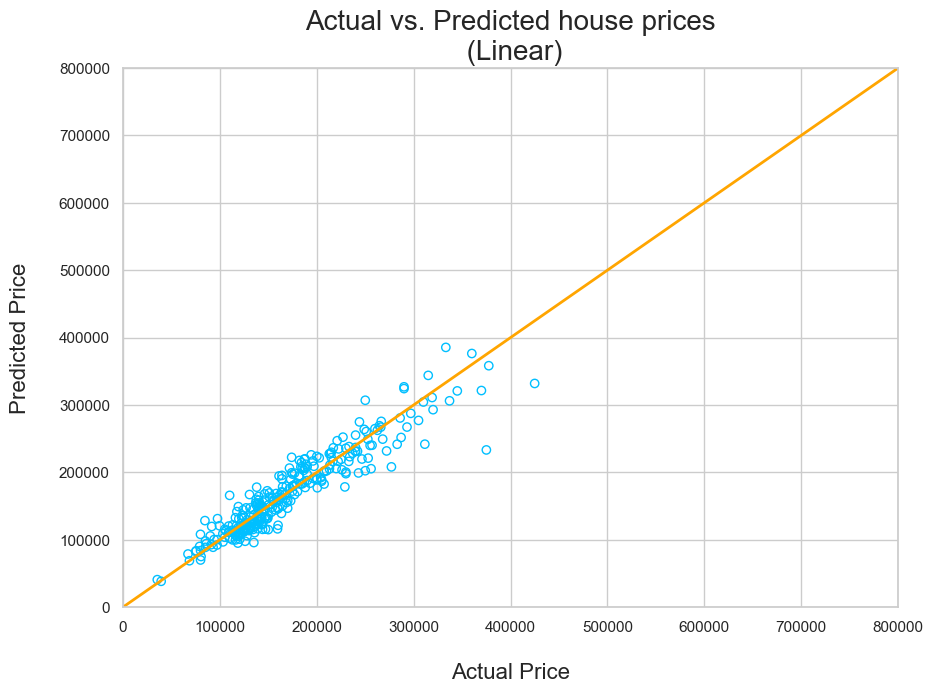

In [348]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (Linear)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_lin),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "orange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [349]:
scores_ridge = cross_val_score(model_ridge, X_train, y_train,
                 cv=5)

print("Mean scores (Ridge Model):\n", np.mean(scores_ridge))
print("Standard deviation of scores (Ridge Model):\n", np.std(scores_ridge))

Mean scores (Ridge Model):
 0.8842528251262957
Standard deviation of scores (Ridge Model):
 0.015501581075742505


In [350]:
scores_ridge_mse = -1 * cross_val_score(model_ridge, X_train, y_train,
                      cv=5,
                      scoring='neg_mean_squared_error')

print("MSE scores (Ridge Model):\n", scores_ridge_mse)
print("Mean MSE scores:", scores_ridge_mse.mean())

MSE scores (Ridge Model):
 [0.02337664 0.01577526 0.01861776 0.01777685 0.01840472]
Mean MSE scores: 0.018790247310181293


In [351]:
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)
print_score(y_test, y_pred_ridge, "Ridge")

**** Regressor: Ridge ****
R²: 0.8909251638942027
RMSE: 0.12173869864329431



In [352]:
# Save the model results into lists
model_list.append(model_ridge.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_ridge), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_ridge), 4))

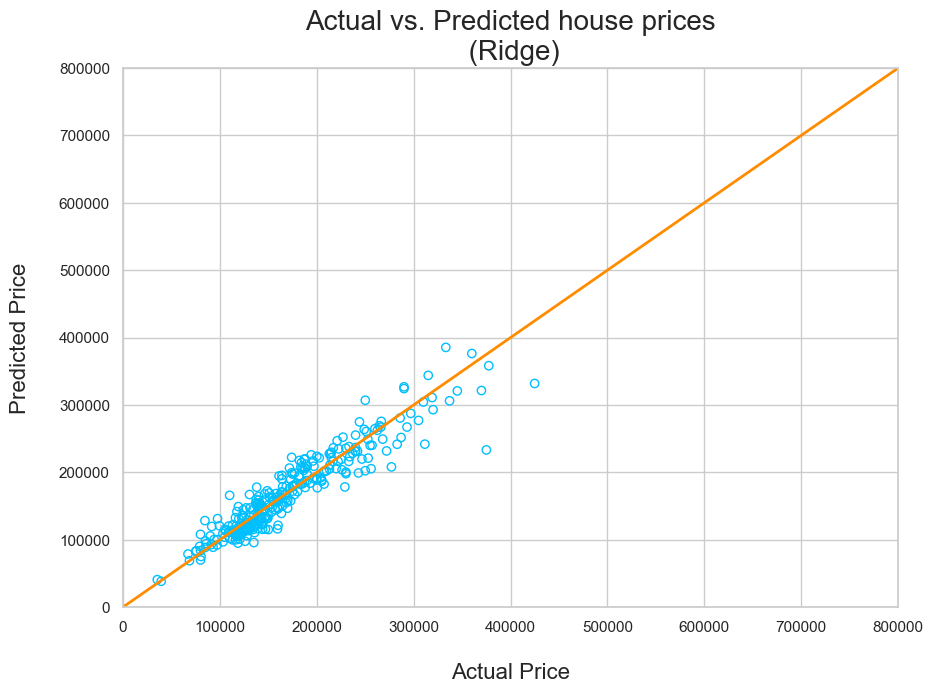

In [353]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (Ridge)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_ridge),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [354]:
# Define hyperparameters
alphas = np.linspace(0, 10, 100).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
ridge_cv = GridSearchCV(Ridge(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
ridge_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {ridge_cv.best_params_}")
print(f"Best R² (train): {ridge_cv.best_score_}")

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best hyperparameters: {'alpha': 10.0}
Best R² (train): 0.8875700489456833


In [355]:
model_ridge_opt = Ridge(alpha = ridge_cv.best_params_["alpha"])
model_ridge_opt.fit(X_train, y_train)
y_pred_ridge_opt = model_ridge_opt.predict(X_test)
print_score(y_test, y_pred_ridge_opt, "Ridge")

**** Regressor: Ridge ****
R²: 0.8910789320656454
RMSE: 0.12165285785787253



In [356]:
# Save the model results into lists
model_list.append(model_ridge_opt.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_ridge_opt), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_ridge_opt), 4))

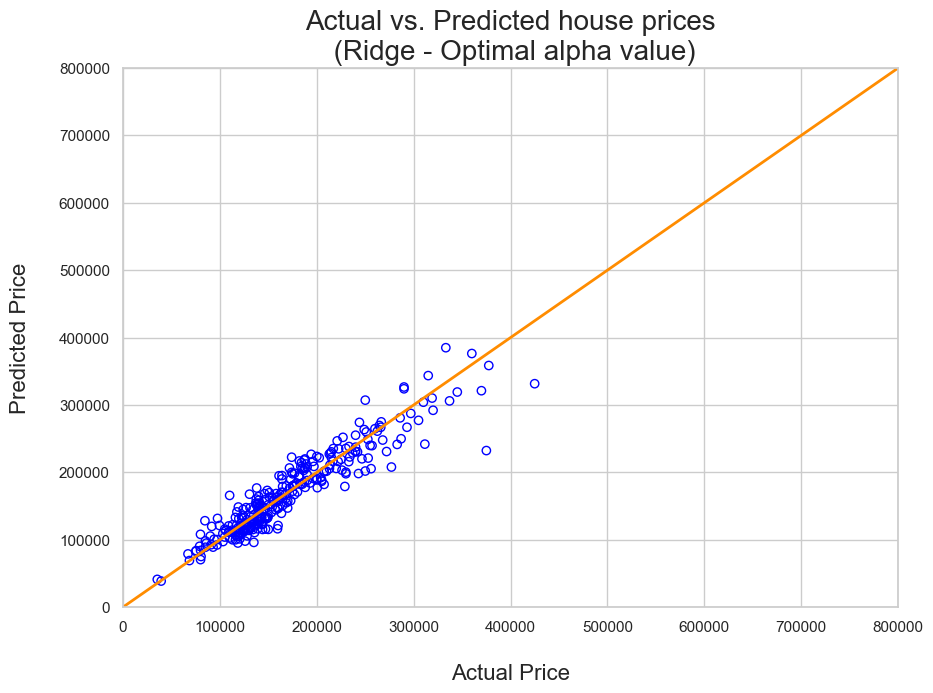

In [357]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (Ridge - Optimal alpha value)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_ridge_opt),
            color="blue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [358]:
scores_lasso = cross_val_score(model_lasso, X_train, y_train,
                                cv=5)

print("Mean scores (Lasso Model):\n", np.mean(scores_lasso))
print("Standard deviation of scores (Lasso Model):\n", np.std(scores_lasso))

Mean scores (Lasso Model):
 0.884762710606538
Standard deviation of scores (Lasso Model):
 0.01474745569128993


In [359]:
scores_lasso_mse = -1 * cross_val_score(model_lasso, X_train, y_train,
                                      cv=5,
                                      scoring='neg_mean_squared_error')

print("MSE scores (Lasso Model):\n", scores_lasso_mse)
print("Mean MSE scores:", scores_lasso_mse.mean())

MSE scores (Lasso Model):
 [0.02363657 0.01587589 0.01804454 0.01746661 0.01866396]
Mean MSE scores: 0.018737512280907493


In [360]:
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)
print_score(y_test, y_pred_lasso, "Lasso")

**** Regressor: Lasso ****
R²: 0.8926412395260337
RMSE: 0.12077724384386389



In [361]:
# Save the model results into lists
model_list.append(model_lasso.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_lasso), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_lasso), 4))

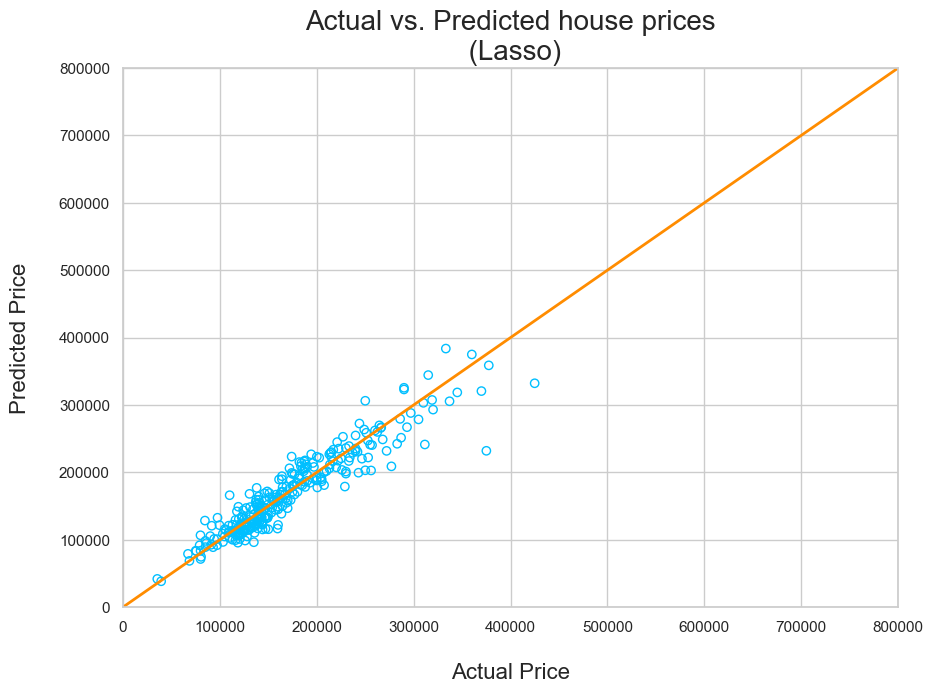

In [362]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (Lasso)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_lasso),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

#### <font color='darkblue'>Hyperparamter Tuning (Lasso)</font>

In [363]:
# Define hyperparameters
alphas = np.logspace(-5, 5, 100).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
lasso_cv = GridSearchCV(Lasso(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
lasso_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {lasso_cv.best_params_}")
print(f"Best R² (train): {lasso_cv.best_score_}")

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best hyperparameters: {'alpha': 0.0013219411484660286}
Best R² (train): 0.8879452948552379


In [364]:
model_lasso_opt = Lasso(alpha = lasso_cv.best_params_["alpha"])

model_lasso_opt.fit(X_train, y_train)
y_pred_lasso_opt = model_lasso_opt.predict(X_test)
print_score(y_test, y_pred_lasso_opt, "Lasso")

**** Regressor: Lasso ****
R²: 0.8930495687019262
RMSE: 0.12054734246150674



In [365]:
# Save the model results into lists
model_list.append(model_lasso_opt.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_lasso_opt), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_lasso_opt), 4))

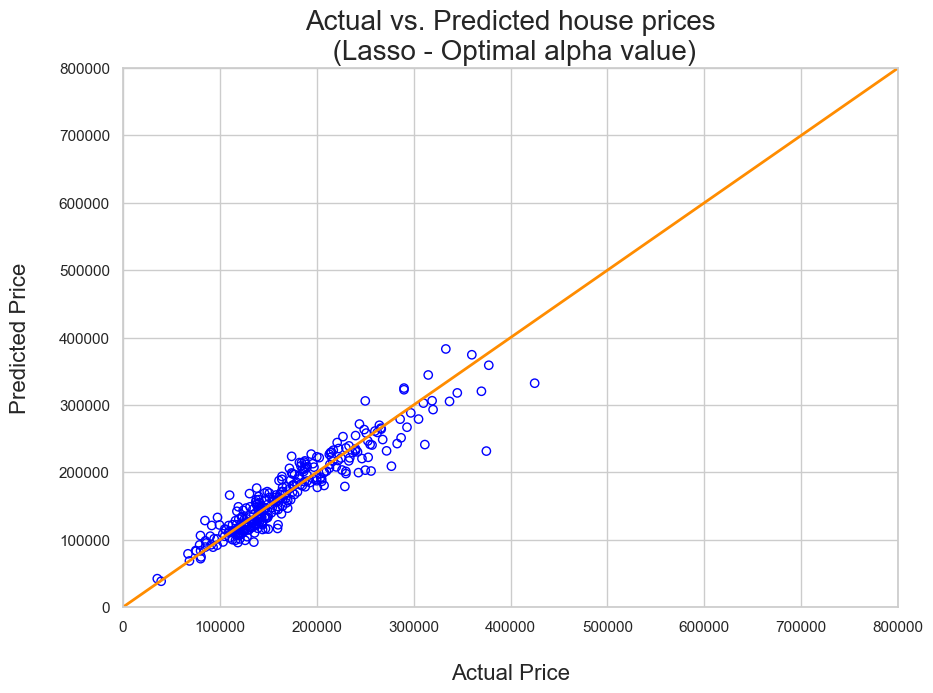

In [366]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (Lasso - Optimal alpha value)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_lasso_opt),
            color="blue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [367]:
scores_ran = cross_val_score(model_ran, X_train, y_train,
                            cv=5)

print("Mean scores (Random Forest Model):\n", np.mean(scores_ran))
print("Standard deviation of scores (Random Forest Model):\n", np.std(scores_ran))

Mean scores (Random Forest Model):
 0.8688127740258246
Standard deviation of scores (Random Forest Model):
 0.024205038191405633


In [368]:
scores_ran_mse = -1 * cross_val_score(model_ran, X_train, y_train,
                                      cv=5,
                                      scoring='neg_mean_squared_error')

print("MSE scores (Random Forest Model):\n", scores_ran_mse)
print("Mean MSE scores:", scores_ran_mse.mean())

MSE scores (Random Forest Model):
 [0.02990973 0.01705223 0.01707165 0.01968897 0.0235714 ]
Mean MSE scores: 0.021458795590108902


In [369]:
model_ran.fit(X_train, y_train)
y_pred_ran = model_ran.predict(X_test)
print_score(y_test, y_pred_ran, "Random Forest")

**** Regressor: Random Forest ****
R²: 0.8514823104163292
RMSE: 0.14205465268501666



In [370]:
# Save the model results into lists
model_list.appendppend(model_ran.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_ran), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_ran), 4))

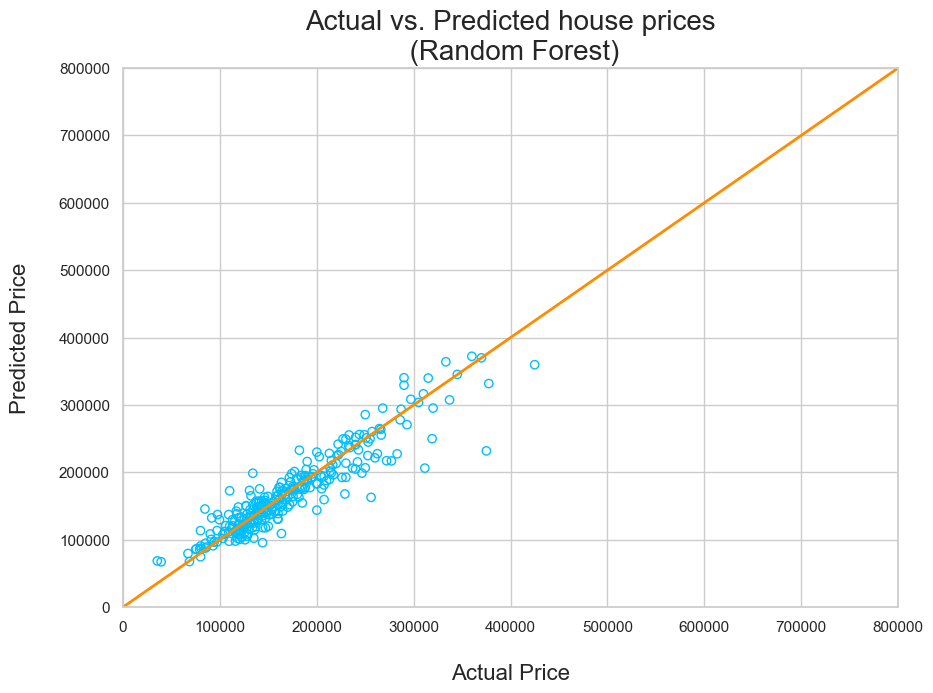

In [371]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (Random Forest)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_ran),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [392]:
from xgboost import XGBRegressor
# Define hyperparameters
tuned_parameters_xgb = {"max_depth": [3],
                        "colsample_bytree": [0.3, 0.7],
                        "learning_rate": [0.01, 0.05, 0.1],
                        "n_estimators": [100, 500, 1000]}

# GridSearch
xgbr_cv = GridSearchCV(estimator=XGBRegressor(),
                       param_grid=tuned_parameters_xgb,
                       cv=5,
                       n_jobs=-1,
                       verbose=1)

# fit the GridSearch on train set
xgbr_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {xgbr_cv.best_params_}\n")
print(f"Best R²: {xgbr_cv.best_score_}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best hyperparameters: {'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}

Best R²: 0.8892276287078857


In [393]:
model_xgb_opt = XGBRegressor(colsample_bytree = xgbr_cv.best_params_["colsample_bytree"],
                             learning_rate = xgbr_cv.best_params_["learning_rate"],
                             max_depth = xgbr_cv.best_params_["max_depth"],
                             n_estimators = xgbr_cv.best_params_["n_estimators"])

model_xgb_opt.fit(X_train, y_train)
y_pred_xgb_opt = model_xgb_opt.predict(X_test)
print_score(y_test, y_pred_xgb_opt, "XGBoost")

**** Regressor: XGBoost ****
R²: 0.8889392614364624
RMSE: 0.12284195108360554



In [394]:
# Save the model results into lists
model_list.append(model_xgb_opt.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_xgb_opt), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_xgb_opt), 4))

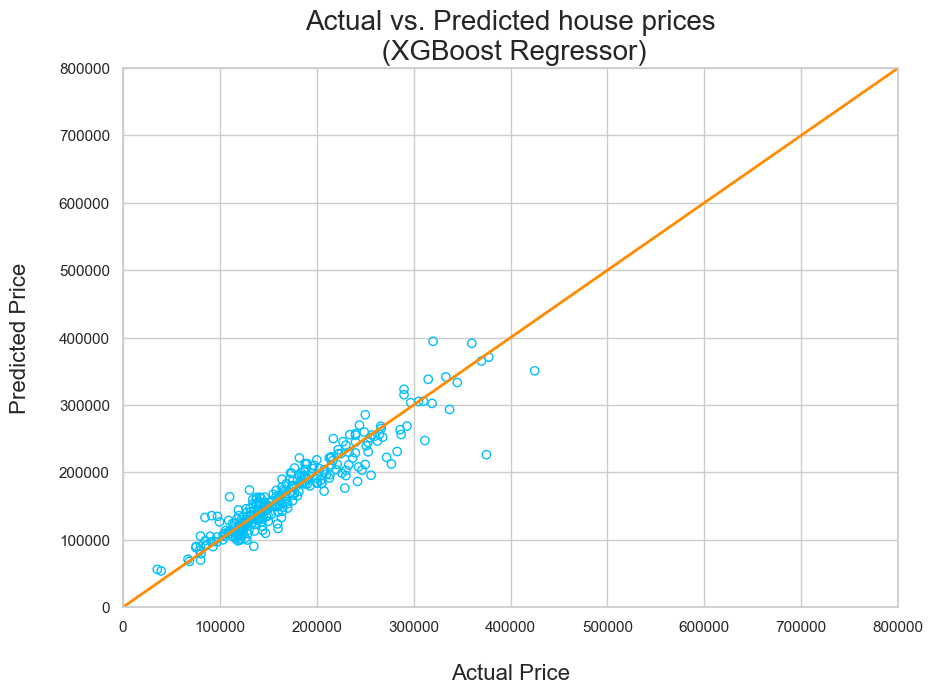

In [395]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (XGBoost Regressor)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_xgb_opt),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [406]:
# 定义加权方法
def weighted_method(test_pre1, test_pre2, test_pre3, test_pre4, test_pre5, w=[0.2, 0.2, 0.2, 0.2, 0.2]):
    weighted_result = (w[0] * pd.Series(test_pre1) +
                       w[1] * pd.Series(test_pre2) +
                       w[2] * pd.Series(test_pre3) +
                       w[3] * pd.Series(test_pre4) +
                       w[4] * pd.Series(test_pre5))
    return weighted_result

# 对预测数据降维
y_pred_lin = y_pred_lin.ravel()
y_pred_ridge = y_pred_ridge.ravel()
y_pred_lasso = y_pred_lasso_opt.ravel()
y_pred_ran = y_pred_ran.ravel()
y_pred_xgb_opt = y_pred_xgb_opt.ravel()

# 定义加权权重
w = [0.2, 0.2, 0.2, 0.2, 0.2]

# 计算加权平均预测结果
weighted_pred = weighted_method(y_pred_lin, y_pred_ridge, y_pred_lasso, y_pred_ran, y_pred_xgb_opt, w)

# 打印加权平均后的 RMSE
print(f"Pre RMSE_weighted: {round(rmse_score(y_test, weighted_pred), 4)}")

Pre RMSE_weighted: 0.1172


In [411]:
# Prediction of House Prices using the Optimal Lasso Regression Model

y_pred = np.exp(model_xgb_opt.predict(df_test_new))

output = pd.DataFrame({"Id": Id_test_list,"SalePrice": y_pred})

In [412]:
y_pred

array([107314.79, 156779.7 , 179167.25, ..., 149453.92, 123287.91,
       234589.84], dtype=float32)

In [414]:
# Save the output
output.to_csv("submission5.csv", index=False)